                         file  \
0   respi_20250310_111645.txt   
1   respi_20250310_133455.txt   
2   respi_20250310_145836.txt   
3   respi_20250310_153402.txt   
4   respi_20250311_125224.txt   
5   respi_20250311_132313.txt   
6   respi_20250312_082147.txt   
7   respi_20250312_090451.txt   
8   respi_20250320_090201.txt   
9   respi_20250320_093847.txt   
10  respi_20250320_102350.txt   
11  respi_20250320_104858.txt   
12  respi_20250320_111333.txt   
13  respi_20250320_114134.txt   
14  respi_20250320_124101.txt   
15  respi_20250320_134513.txt   
16  respi_20250320_141545.txt   
17  respi_20250320_150319.txt   
18  respi_20250323_091109.txt   
19  respi_20250323_093517.txt   
20  respi_20250323_103905.txt   
21  respi_20250323_110532.txt   
22  respi_20250323_114537.txt   
23  respi_20250323_124219.txt   
24  respi_20250323_133740.txt   
25  respi_20250323_140749.txt   
26  respi_20250323_143735.txt   
27  respi_20250324_103712.txt   
28  respi_20250324_110551.txt   
29  respi_

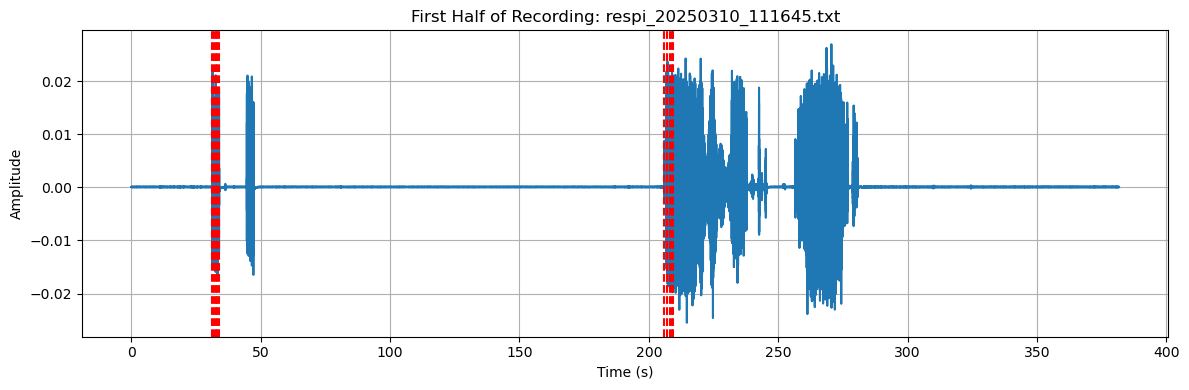

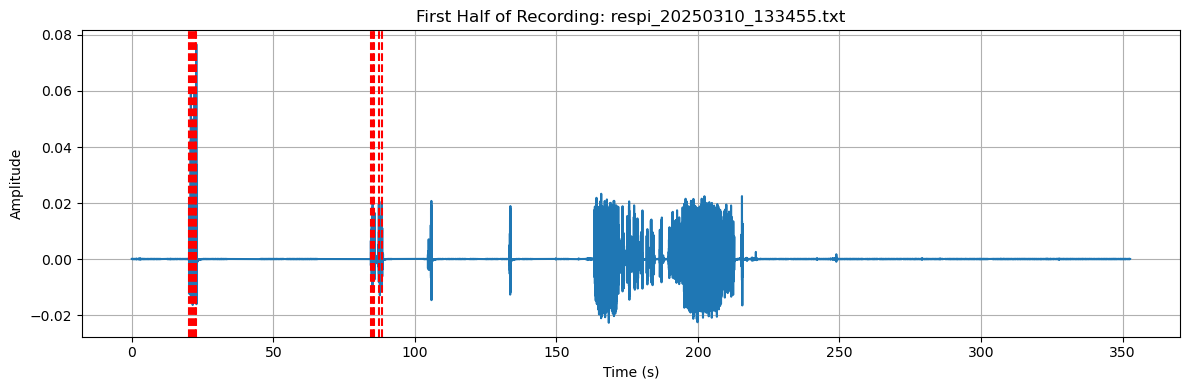

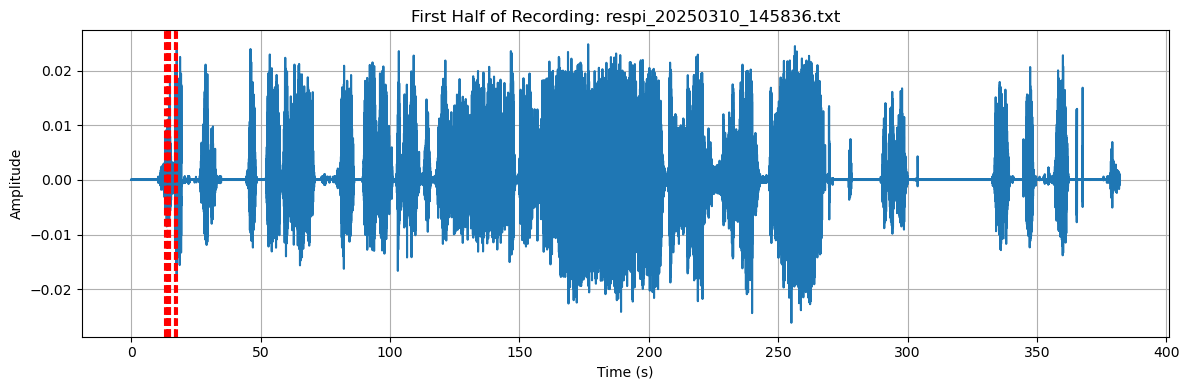

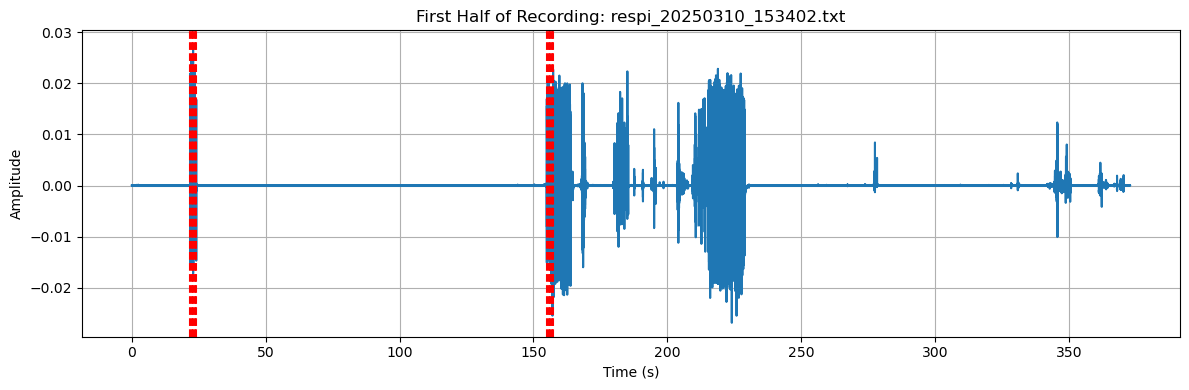

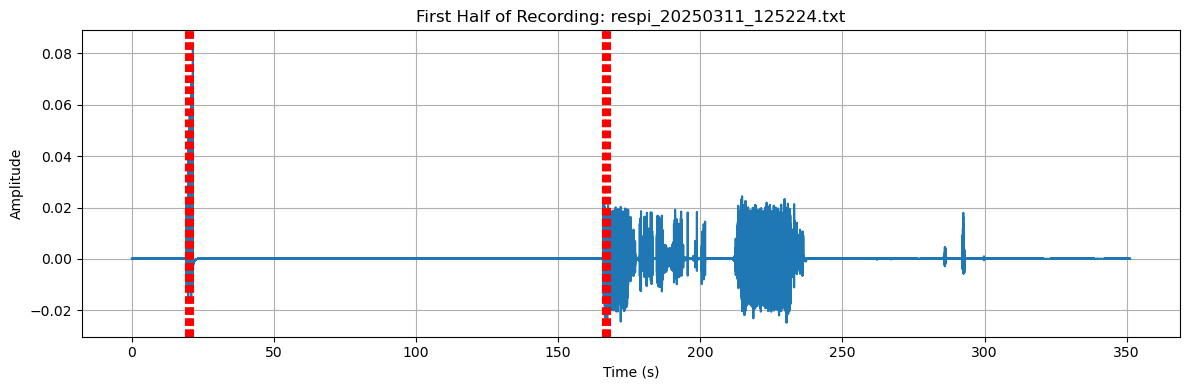

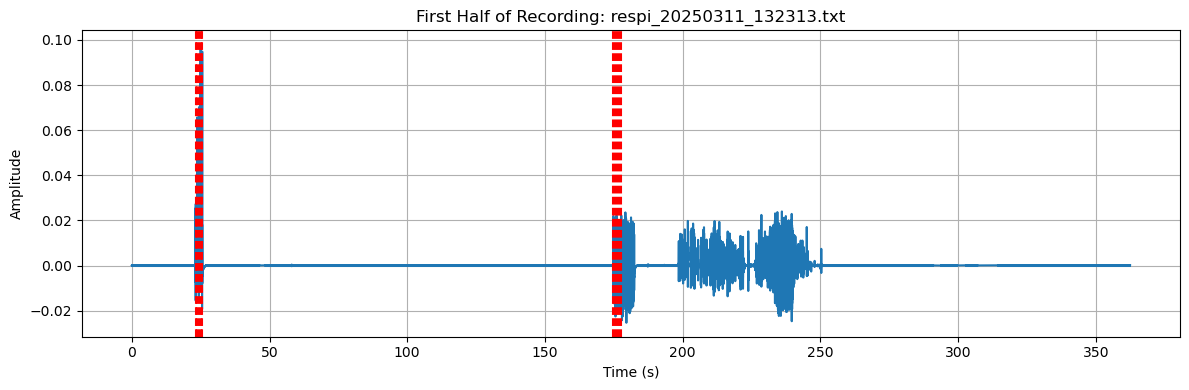

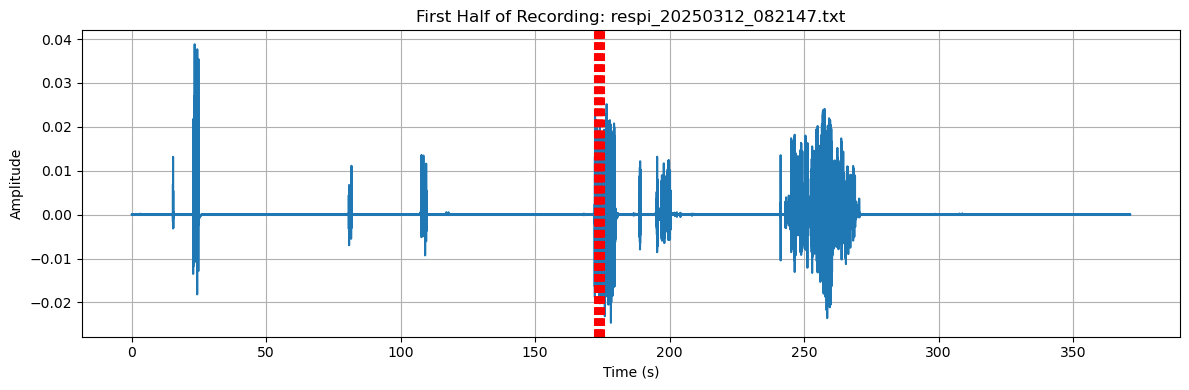

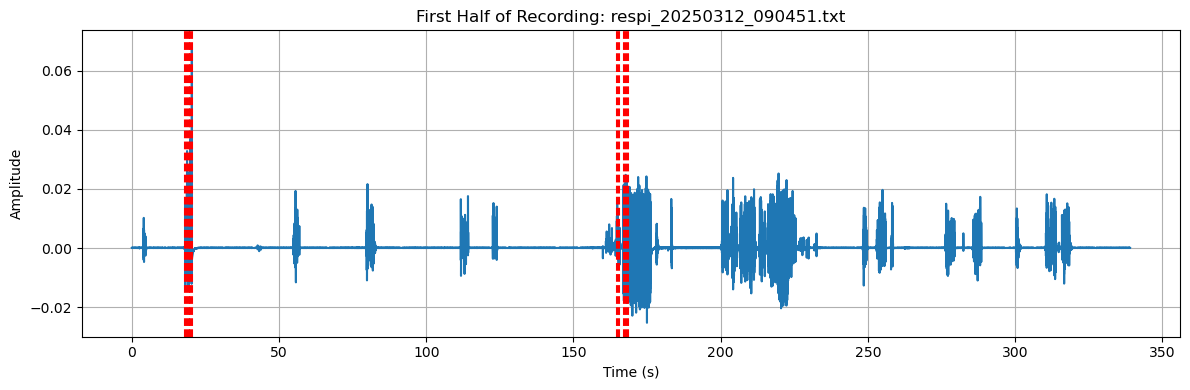

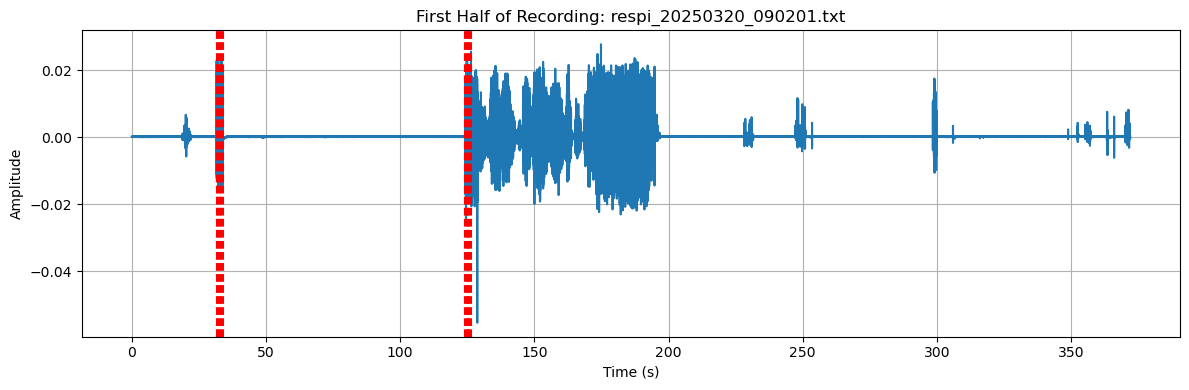

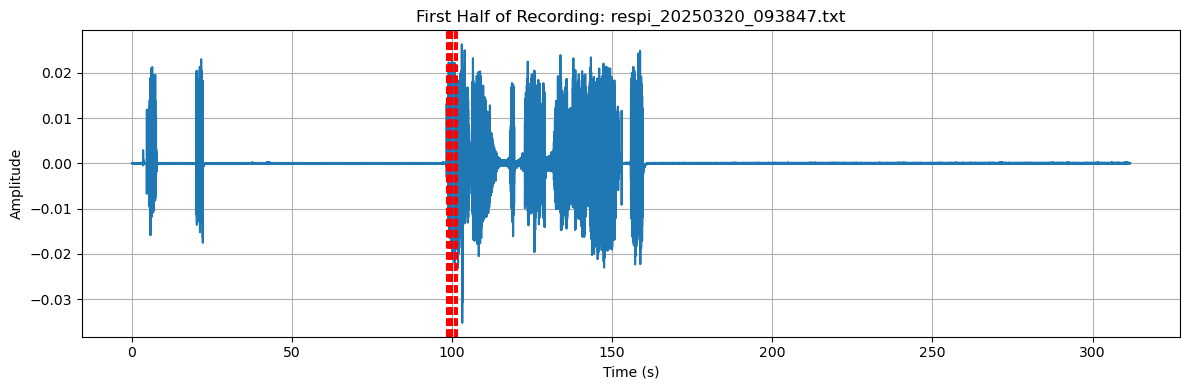

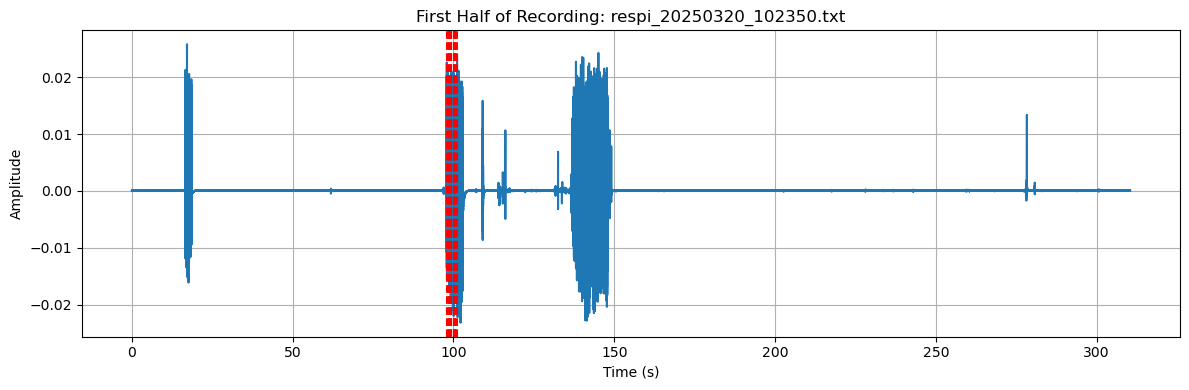

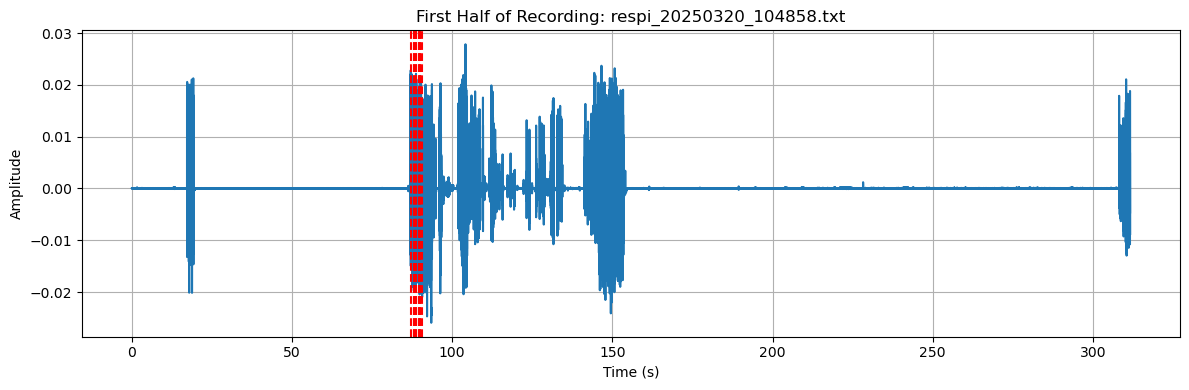

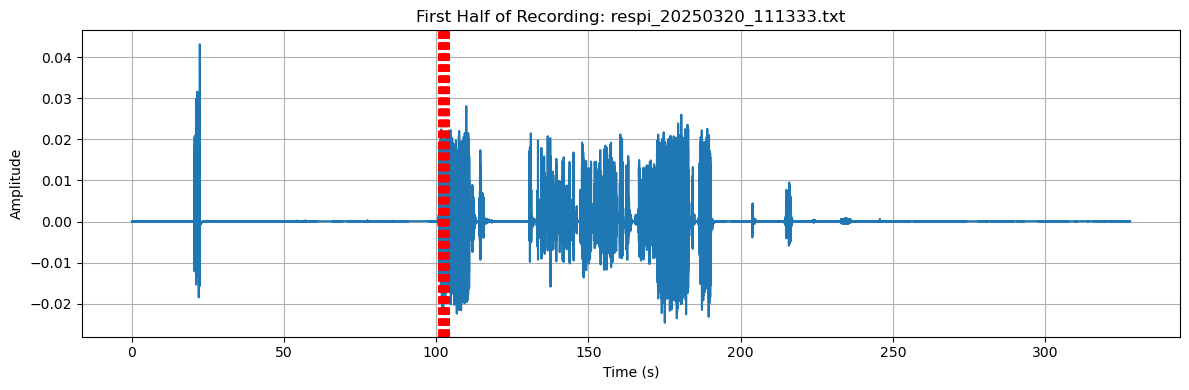

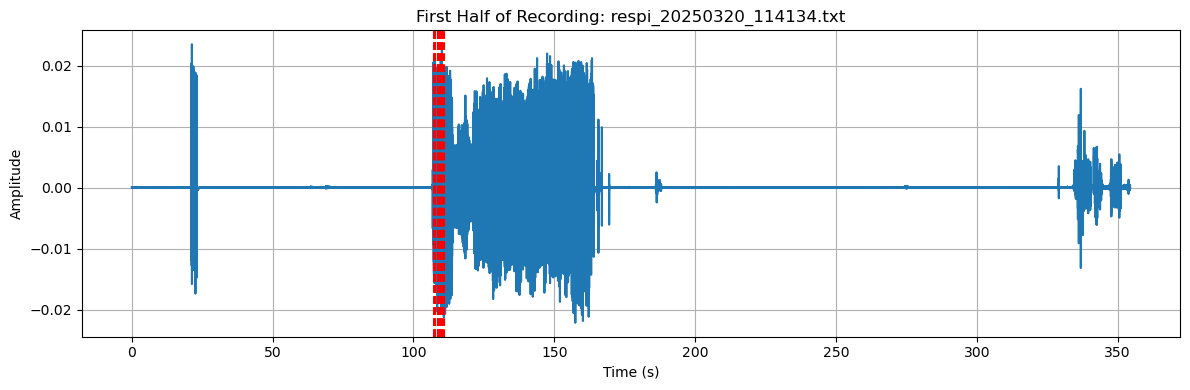

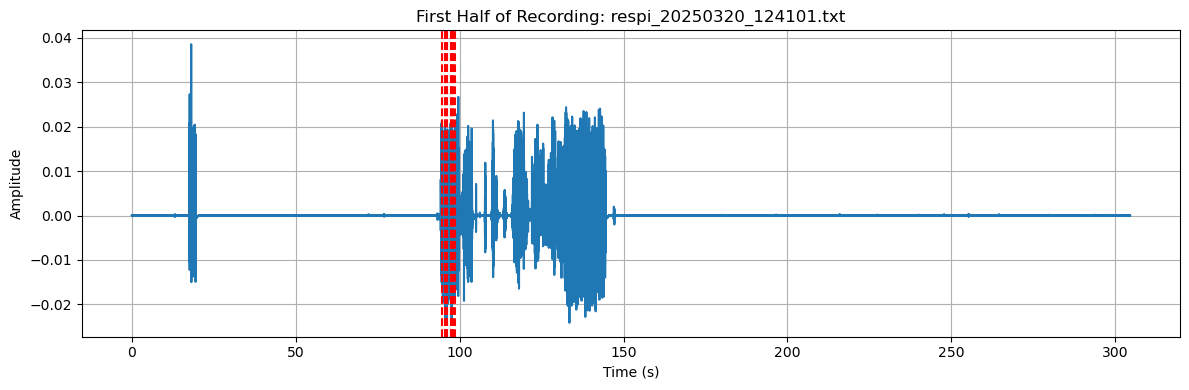

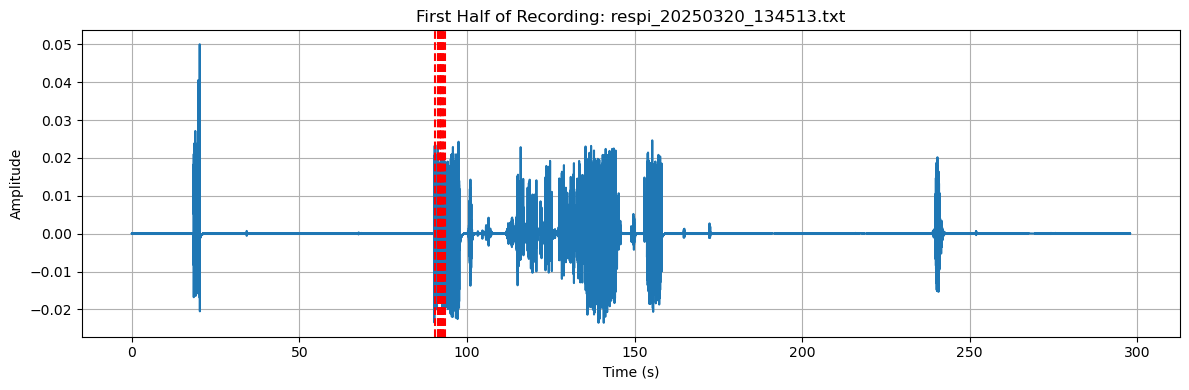

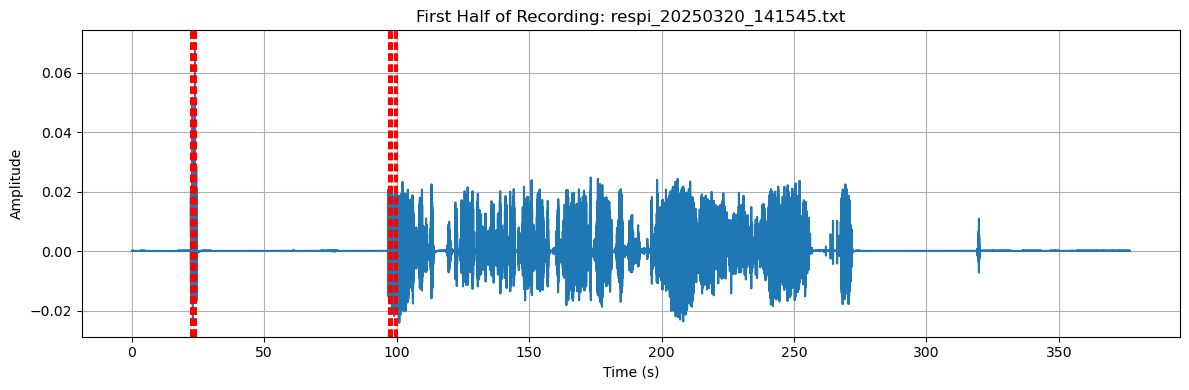

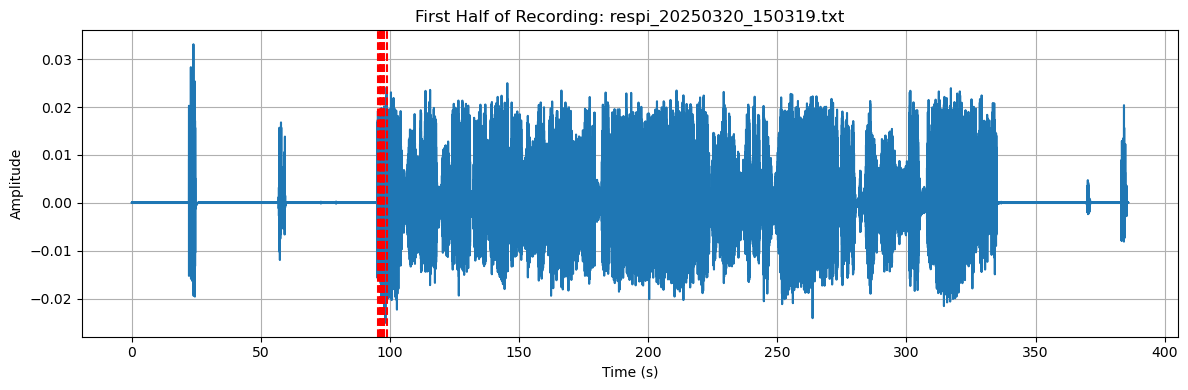

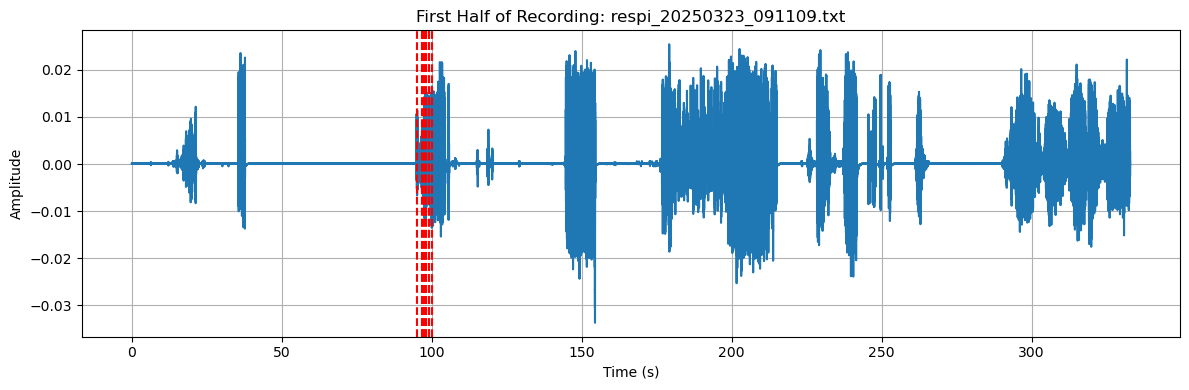

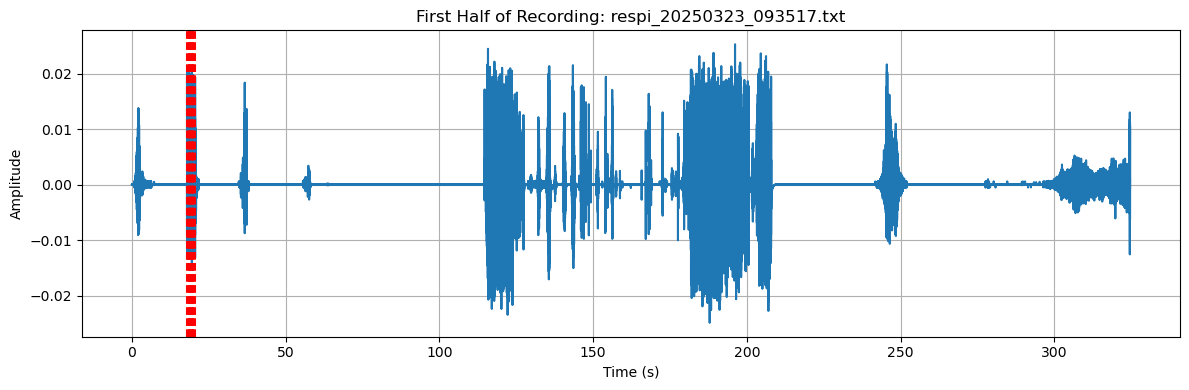

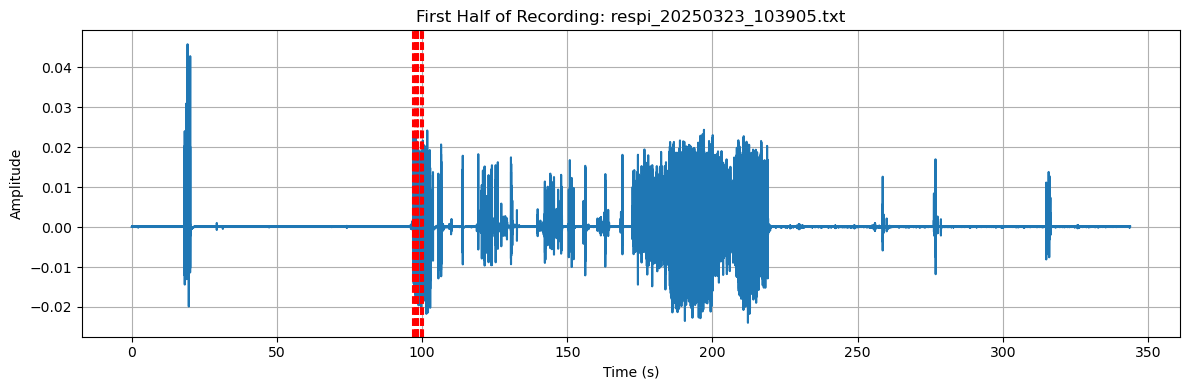

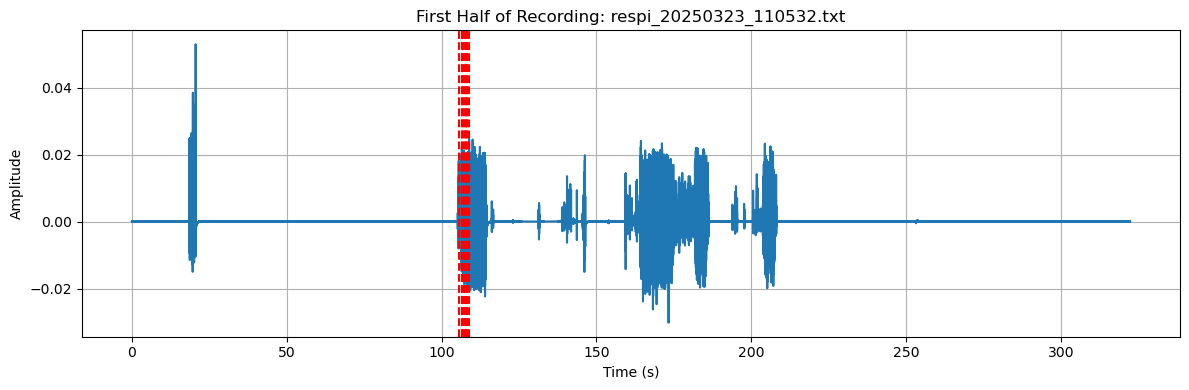

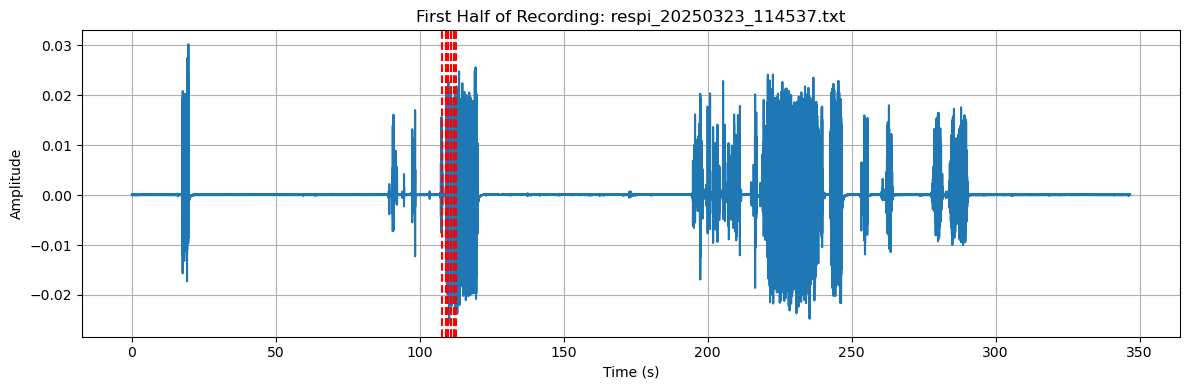

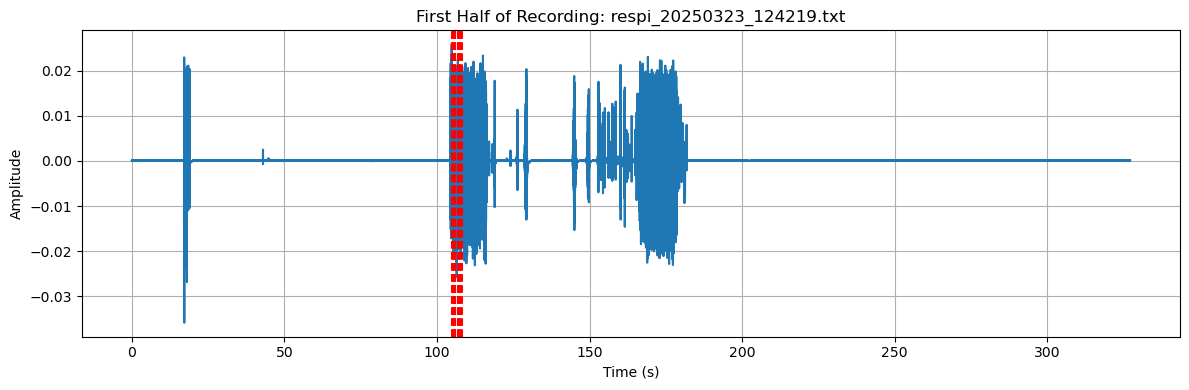

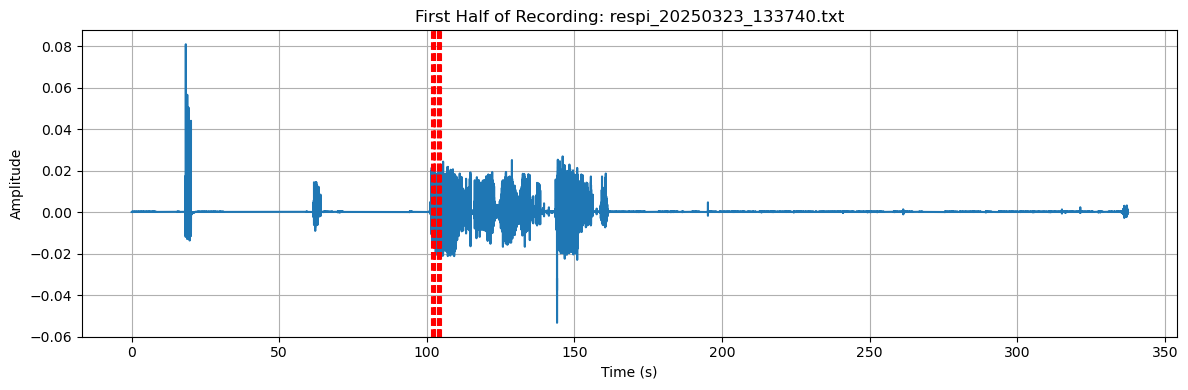

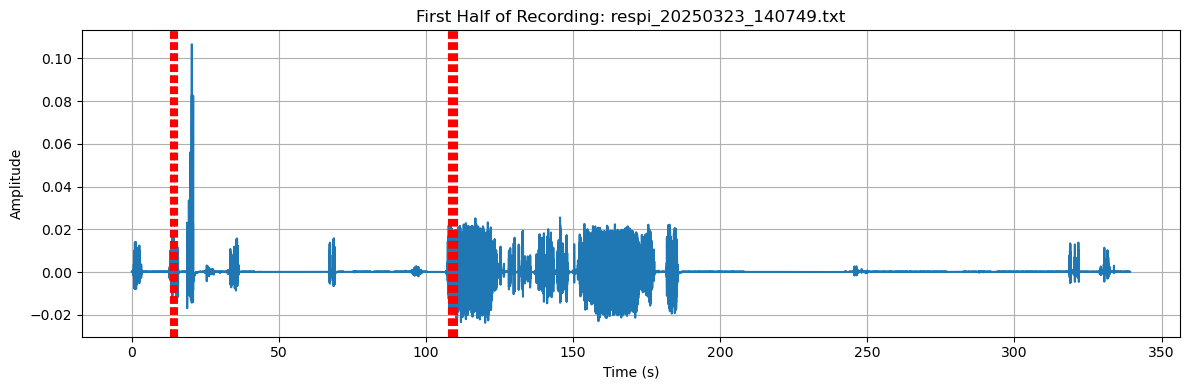

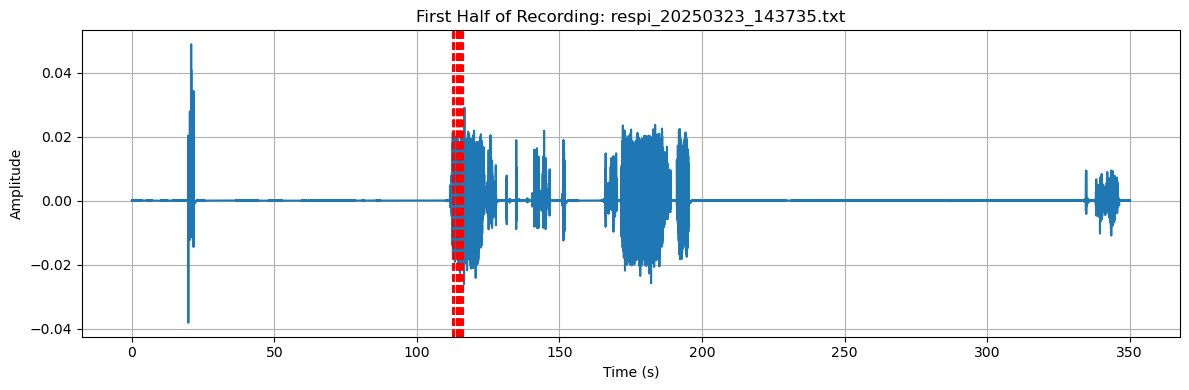

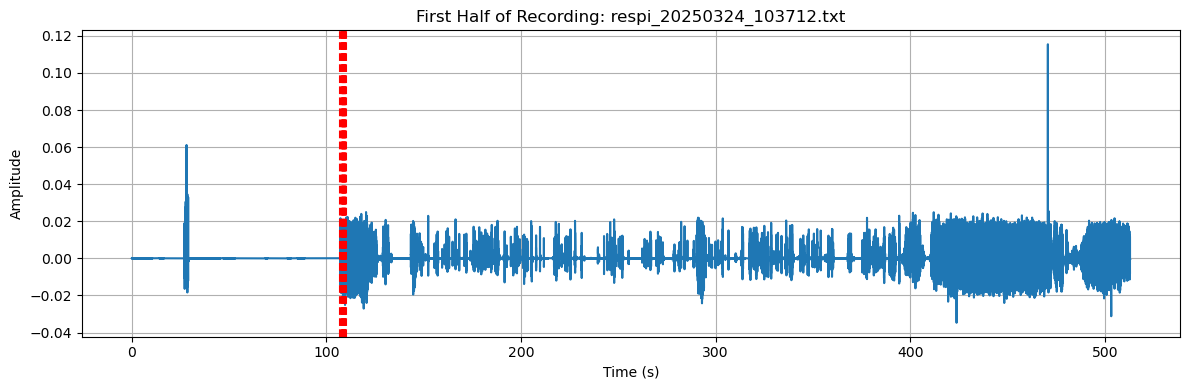

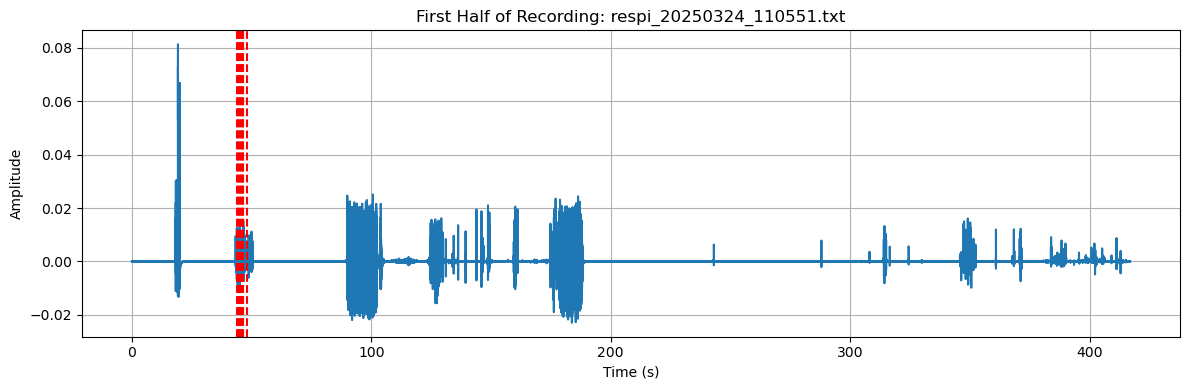

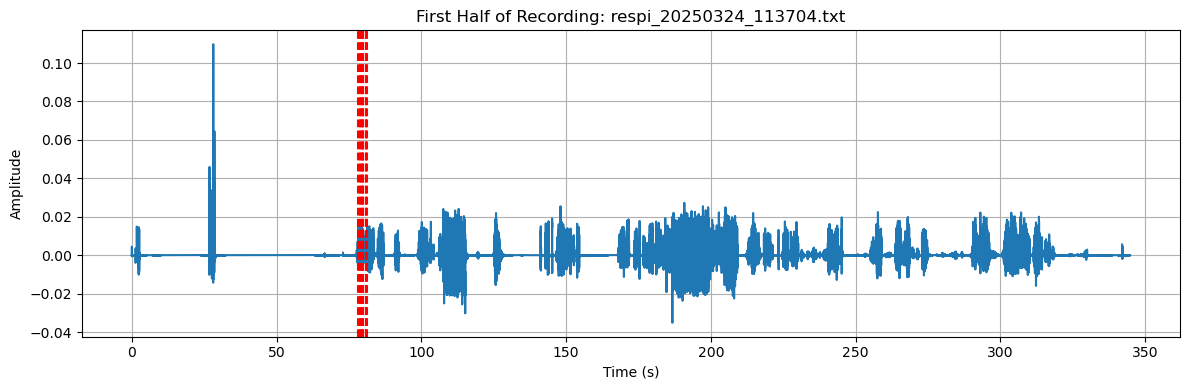

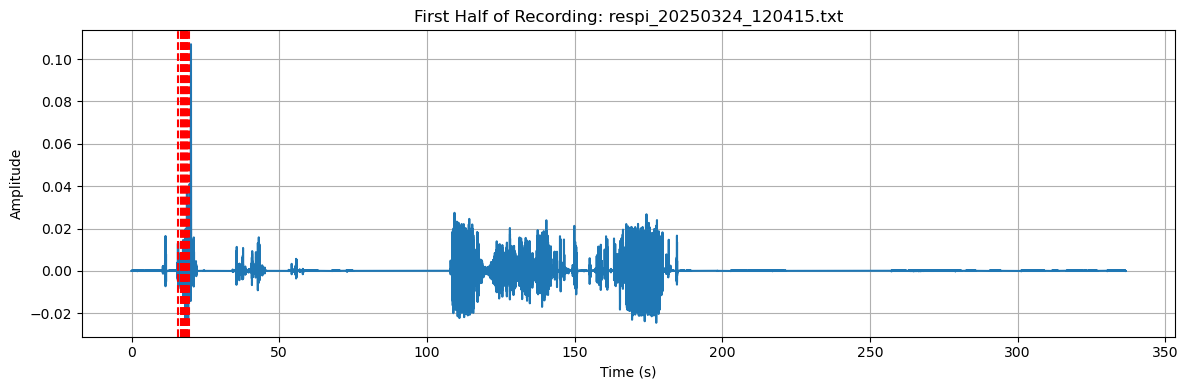

In [1]:
# Detect 5 Sync Pokes in Laser Recordings

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- Parameters ---
data_dir = r"D:\Laser\data\txt_files\flying_bees"
channel_col = 'channel_1'
time_col = 'time'
sampling_rate = 10240  # Hz
poke_min_distance = int(sampling_rate * 0.5)  # minimum distance between pokes in samples (0.5 sec)
poke_prominence = 0.01  # adjust based on signal quality
plot_margin_sec = 5  # seconds to include before and after poke times for plotting
cluster_window_sec = 5  # max time between first and last poke in a cluster

# --- Poke detection function ---
def detect_pokes(time, signal):
    peaks, _ = find_peaks(signal, distance=poke_min_distance, prominence=poke_prominence)
    peak_times = time[peaks]

    midpoint = time[-1] / 2
    clusters = []
    for i in range(len(peak_times) - 4):
        window = peak_times[i:i+5]
        if window[-1] - window[0] <= cluster_window_sec:
            clusters.append(window.tolist())
        if len(clusters) == 2:
            break

    return clusters if clusters else None

# --- Processing all files ---
results = []

for filename in os.listdir(data_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(data_dir, filename)
        try:
            df = pd.read_csv(file_path, sep='\t')
            if channel_col not in df.columns or time_col not in df.columns:
                print(f"Skipping {filename}: Missing required columns")
                continue

            signal = df[channel_col].values
            time = df[time_col].values

            poke_clusters = detect_pokes(time, signal)

            if poke_clusters is not None:
                results.append({"file": filename, "poke_clusters": poke_clusters})
            else:
                print(f"Could not detect 5 pokes in {filename}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# --- Output Summary ---
pd.set_option('display.max_colwidth', None)
summary_df = pd.DataFrame(results)
print(summary_df)

# Optional: Save to CSV
summary_df.to_csv(r"C:\Users\labadmin\Documents\Uppsala analyses\Flying bouts\detected_sync_pokes.csv", index=False)

# Visualize the first half of each file
for _, row in summary_df.iterrows():
    file_path = os.path.join(data_dir, row['file'])
    df_vis = pd.read_csv(file_path, sep='\t')
    signal_vis = df_vis[channel_col].values
    time_vis = df_vis[time_col].values

    midpoint = time_vis[-1] / 2
    mask = time_vis <= midpoint

    plt.figure(figsize=(12, 4))
    plt.plot(time_vis[mask], signal_vis[mask], label='Raw Signal')
    if row['poke_clusters']:
        for cluster in row['poke_clusters'][:2]:
            for pt in cluster:
                if pt <= midpoint:
                    plt.axvline(x=pt, color='r', linestyle='--')
    plt.title(f"First Half of Recording: {row['file']}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

                         file  \
0   respi_20250310_111645.txt   
1   respi_20250310_133455.txt   
2   respi_20250310_145836.txt   
3   respi_20250310_153402.txt   
4   respi_20250311_125224.txt   
5   respi_20250311_132313.txt   
6   respi_20250312_082147.txt   
7   respi_20250312_090451.txt   
8   respi_20250320_090201.txt   
9   respi_20250320_093847.txt   
10  respi_20250320_102350.txt   
11  respi_20250320_104858.txt   
12  respi_20250320_111333.txt   
13  respi_20250320_114134.txt   
14  respi_20250320_124101.txt   
15  respi_20250320_134513.txt   
16  respi_20250320_141545.txt   
17  respi_20250320_150319.txt   
18  respi_20250323_091109.txt   
19  respi_20250323_093517.txt   
20  respi_20250323_103905.txt   
21  respi_20250323_110532.txt   
22  respi_20250323_114537.txt   
23  respi_20250323_124219.txt   
24  respi_20250323_133740.txt   
25  respi_20250323_140749.txt   
26  respi_20250323_143735.txt   
27  respi_20250324_103712.txt   
28  respi_20250324_110551.txt   
29  respi_

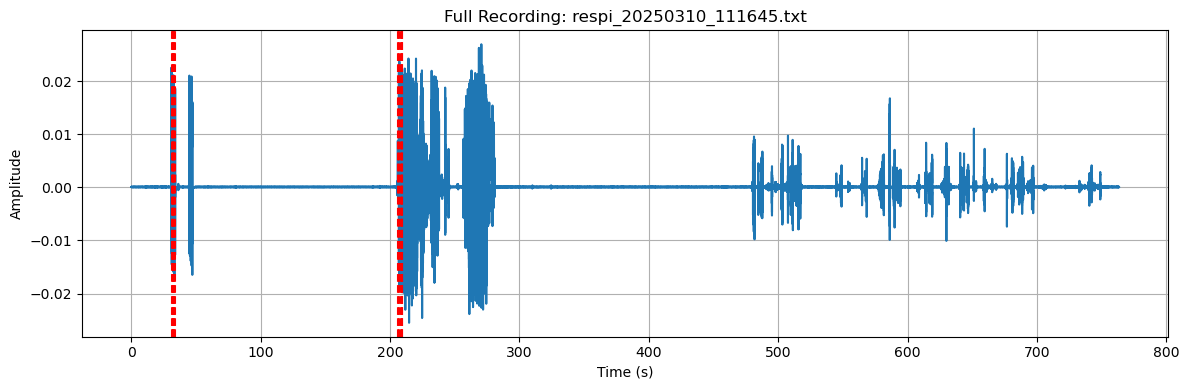

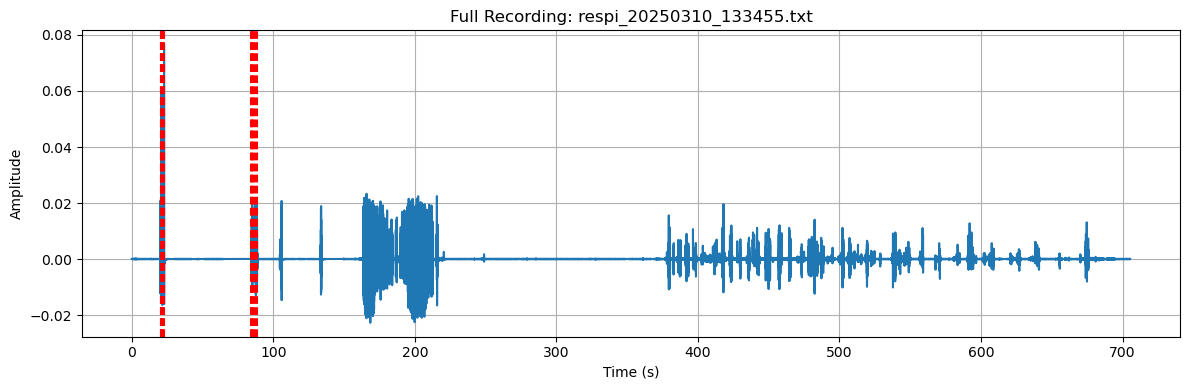

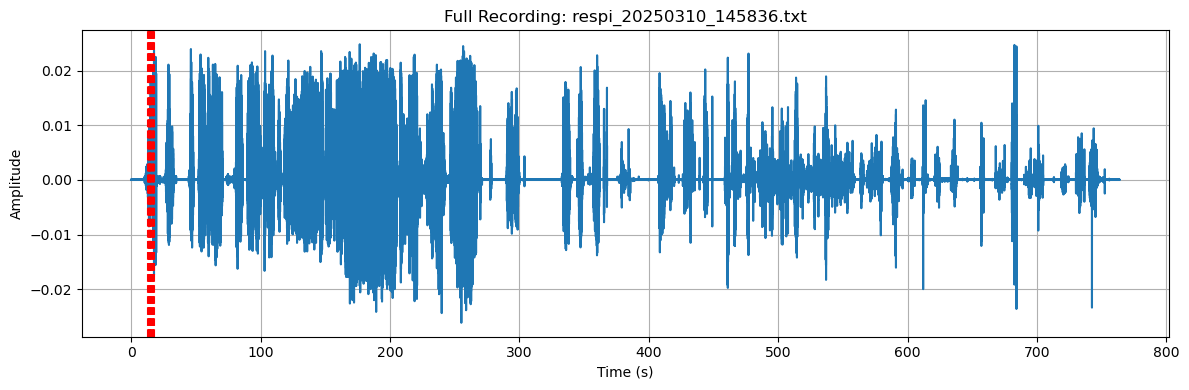

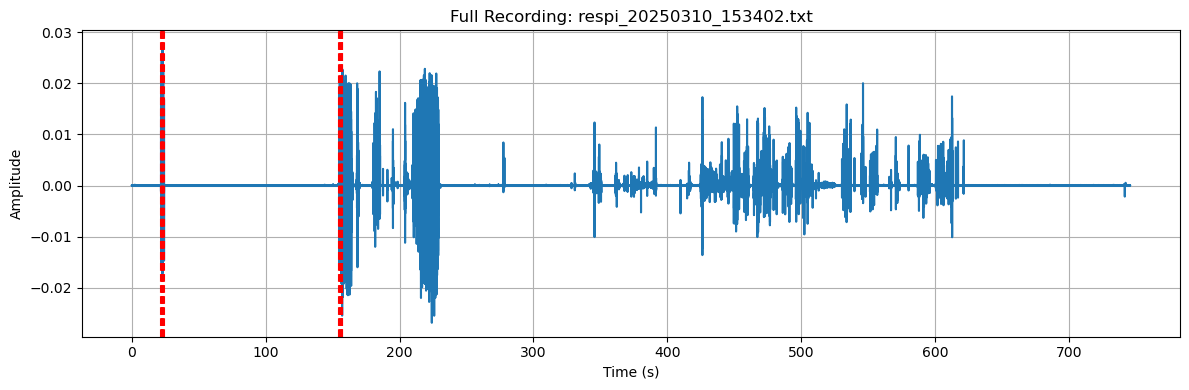

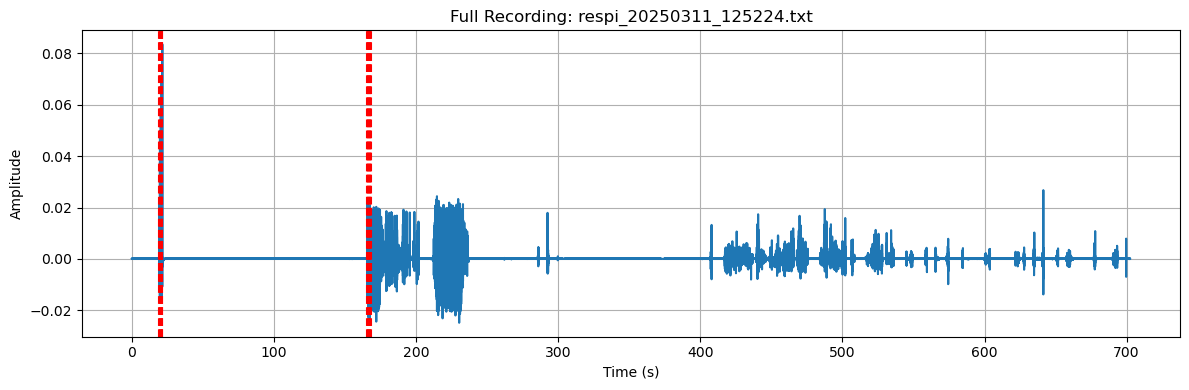

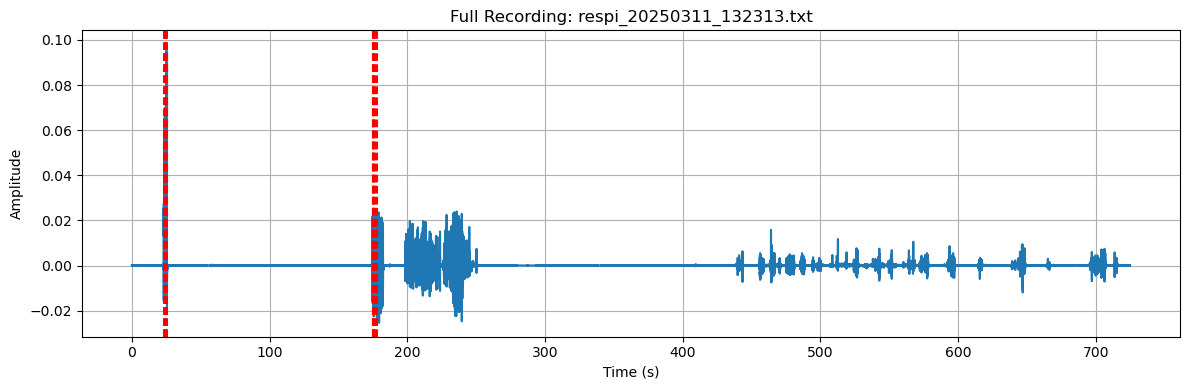

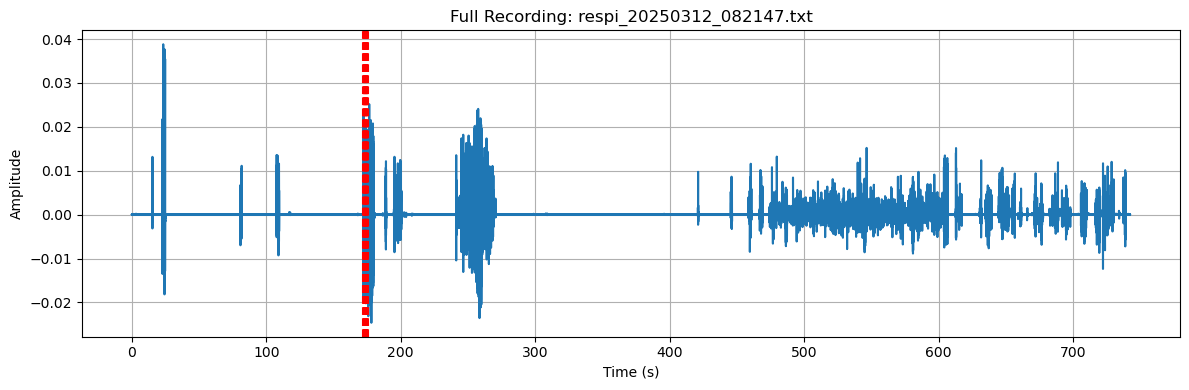

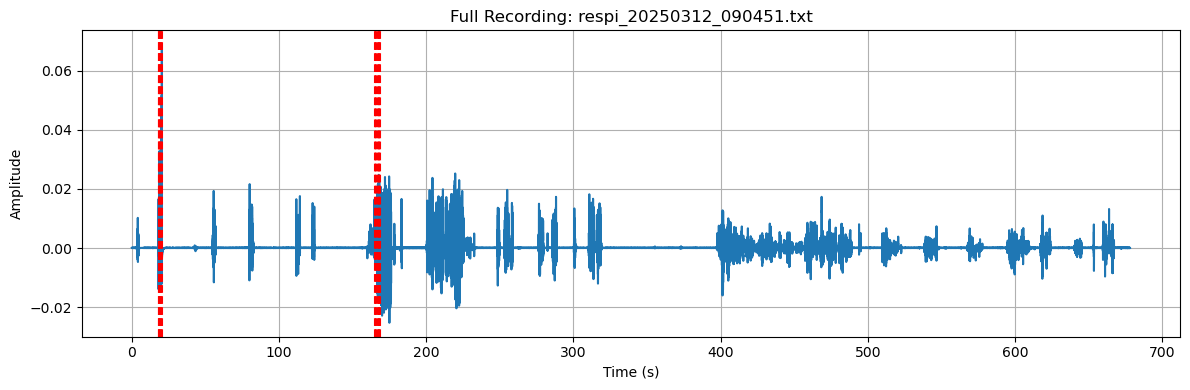

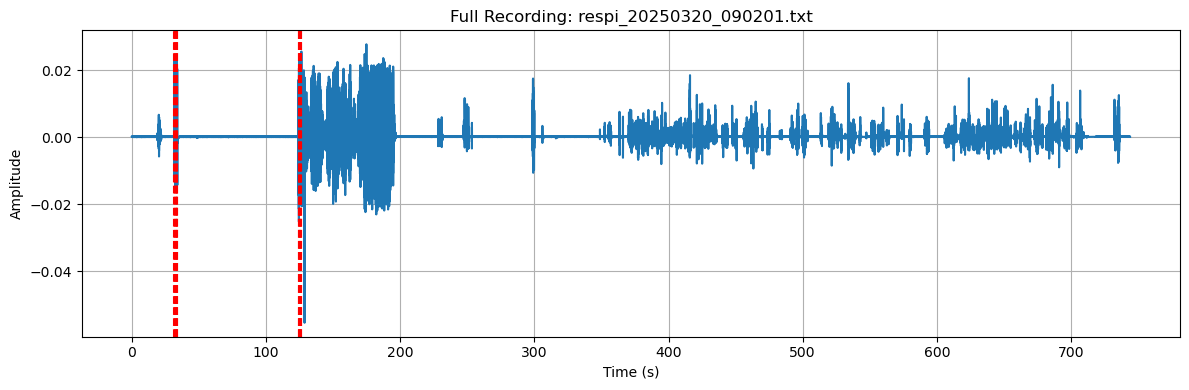

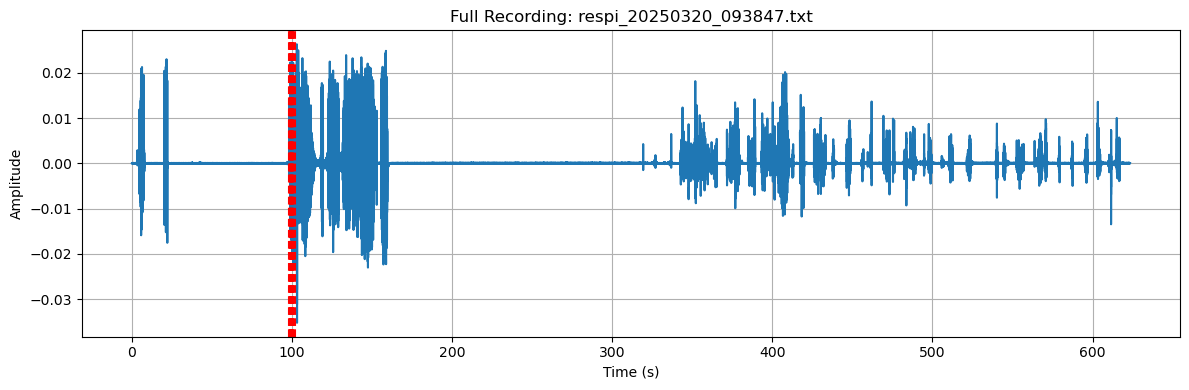

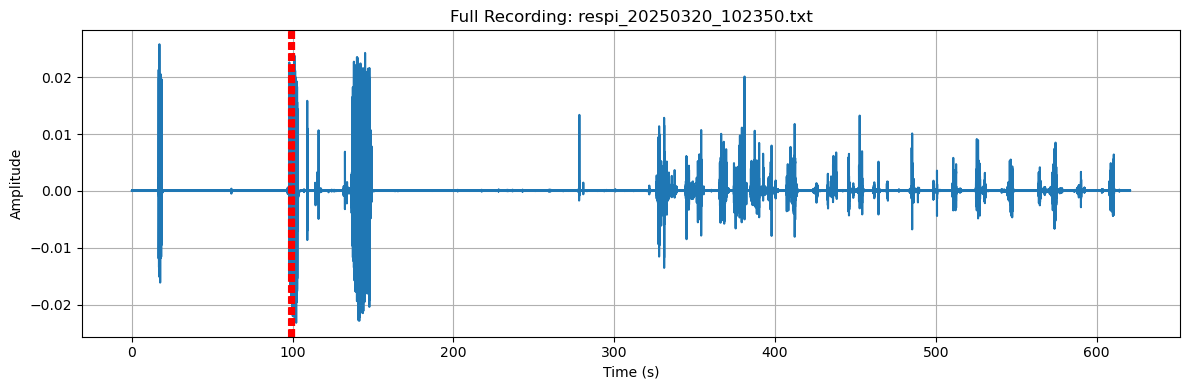

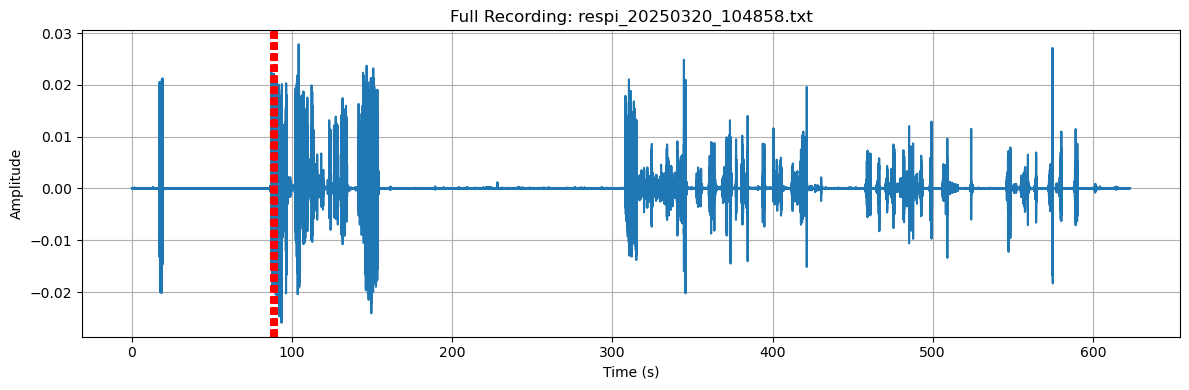

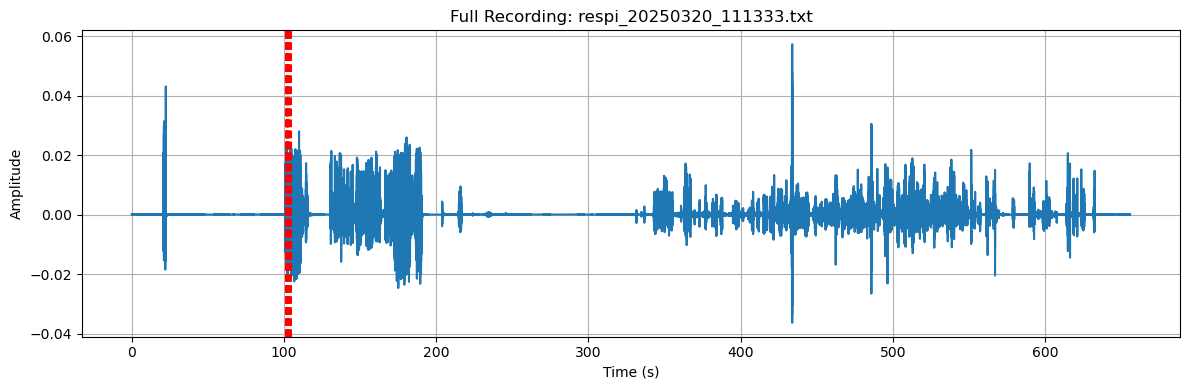

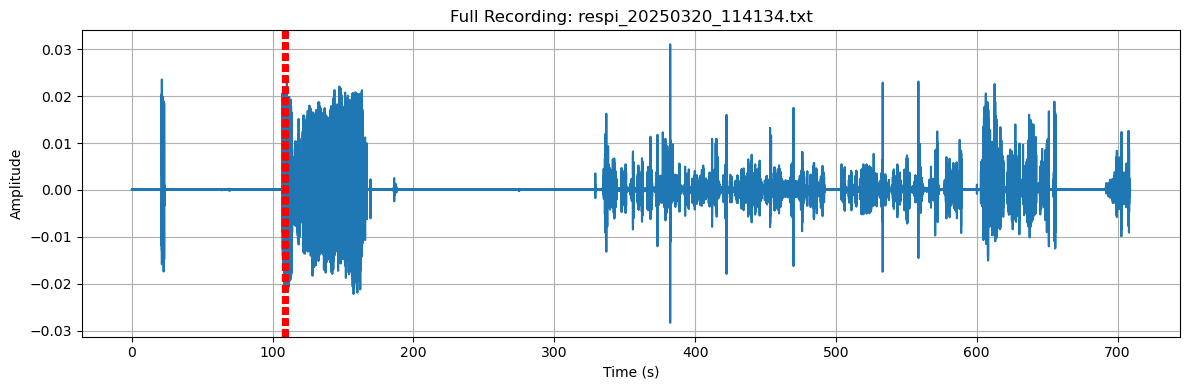

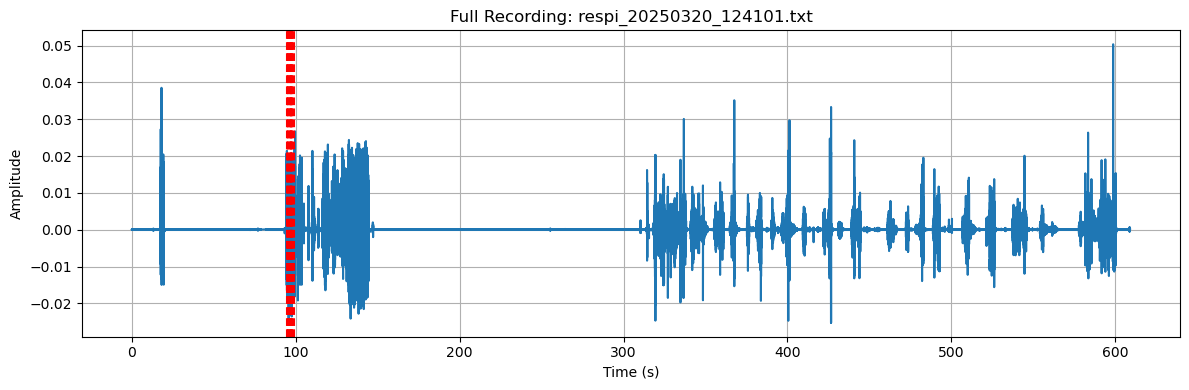

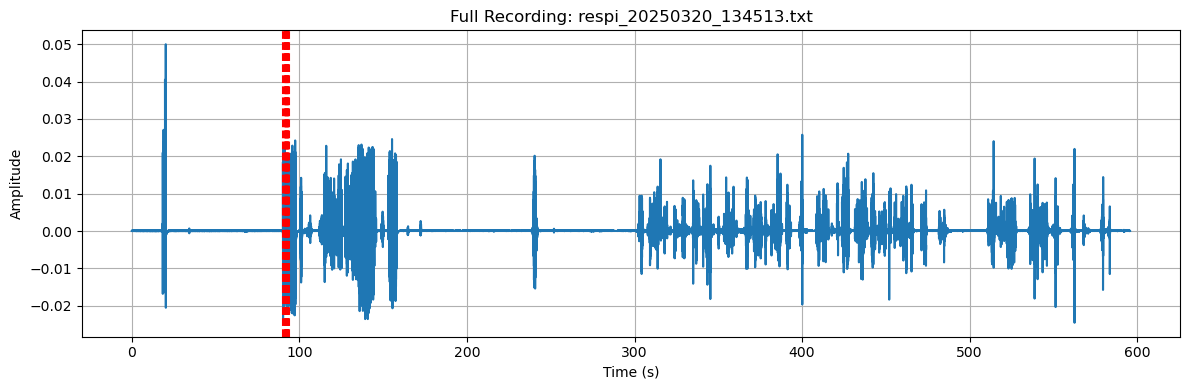

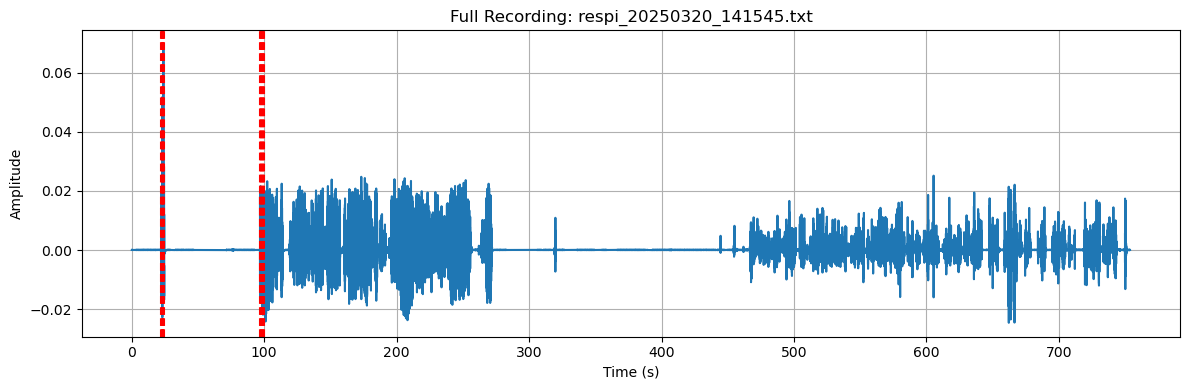

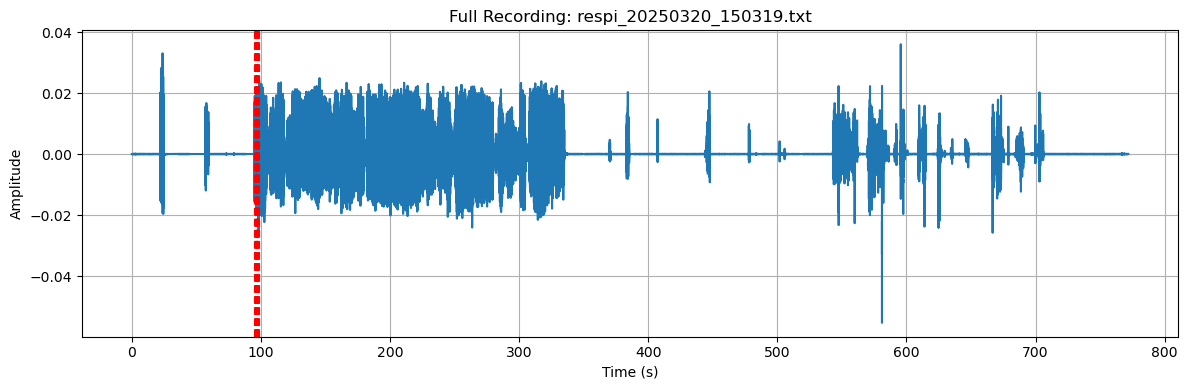

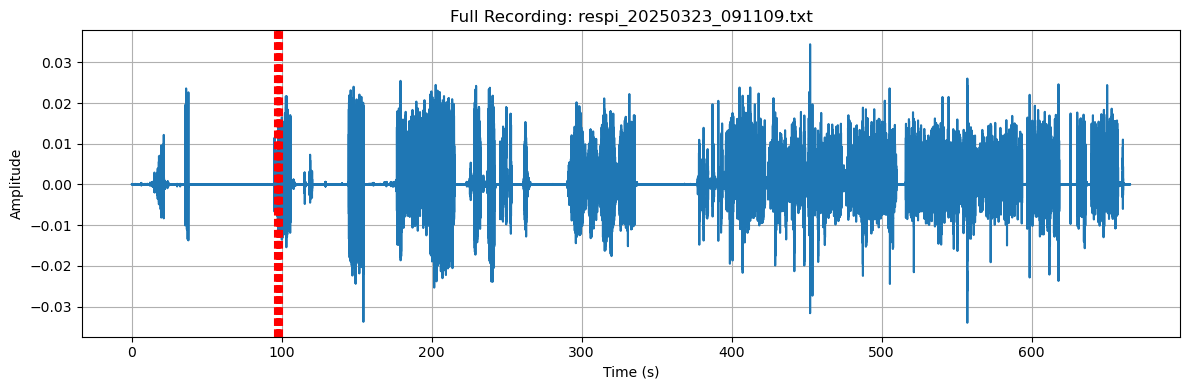

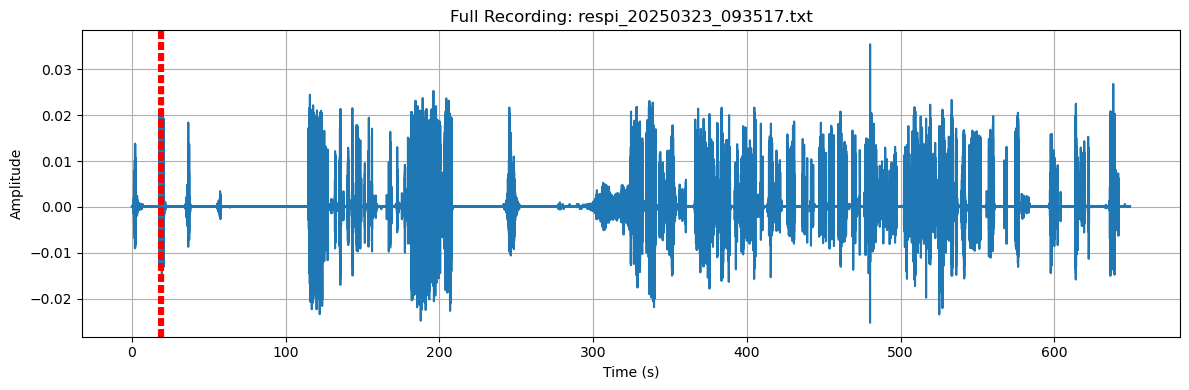

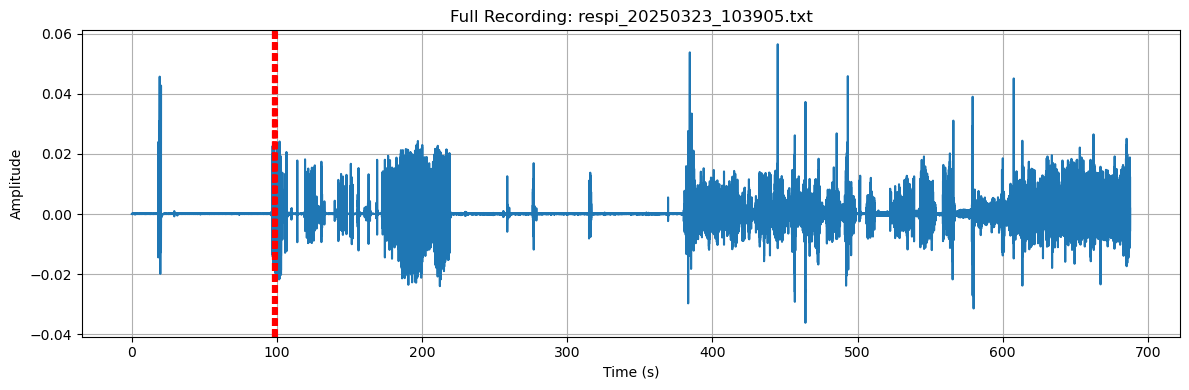

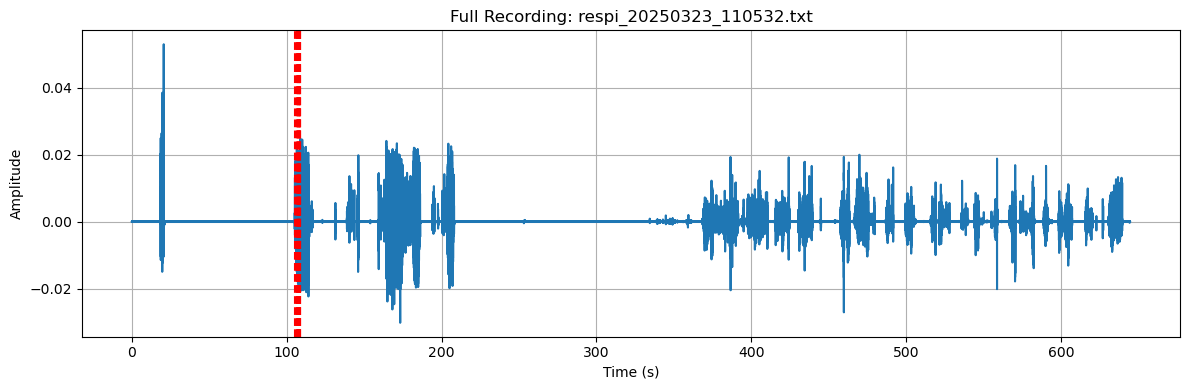

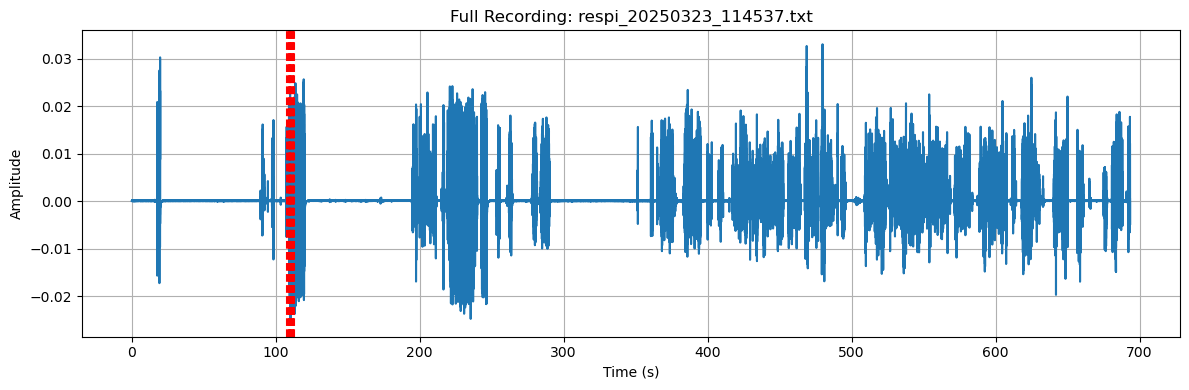

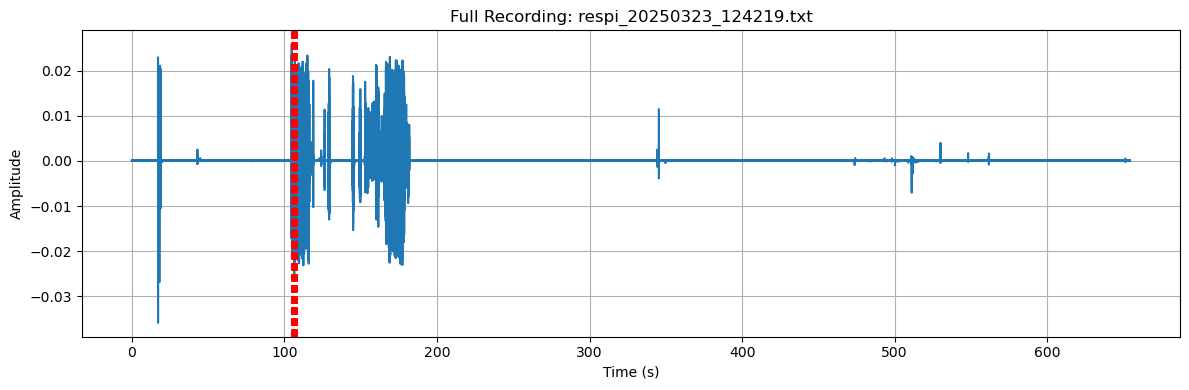

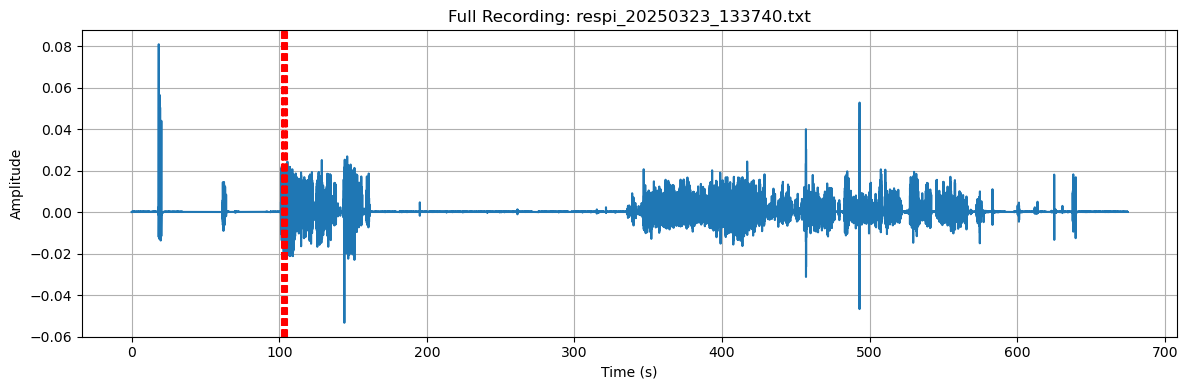

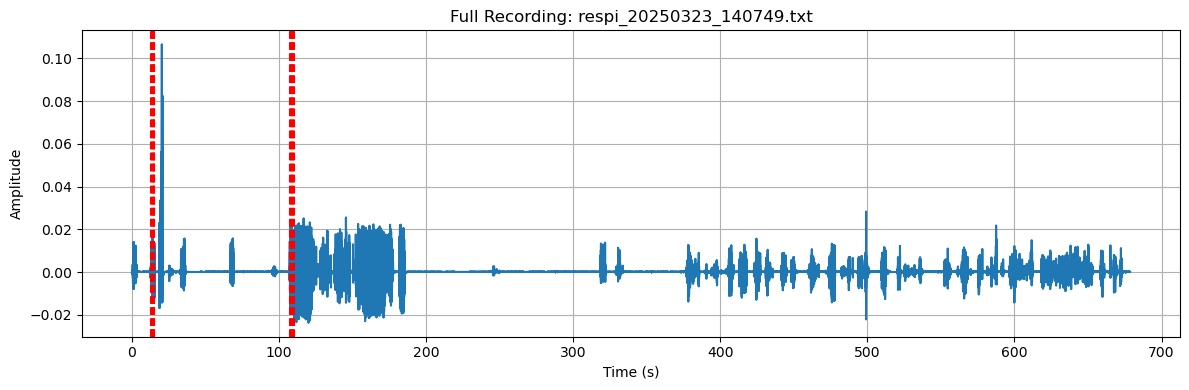

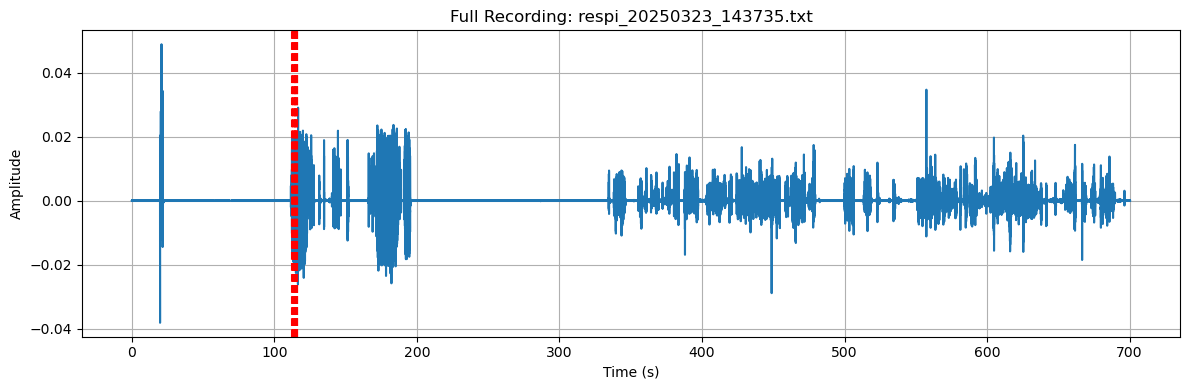

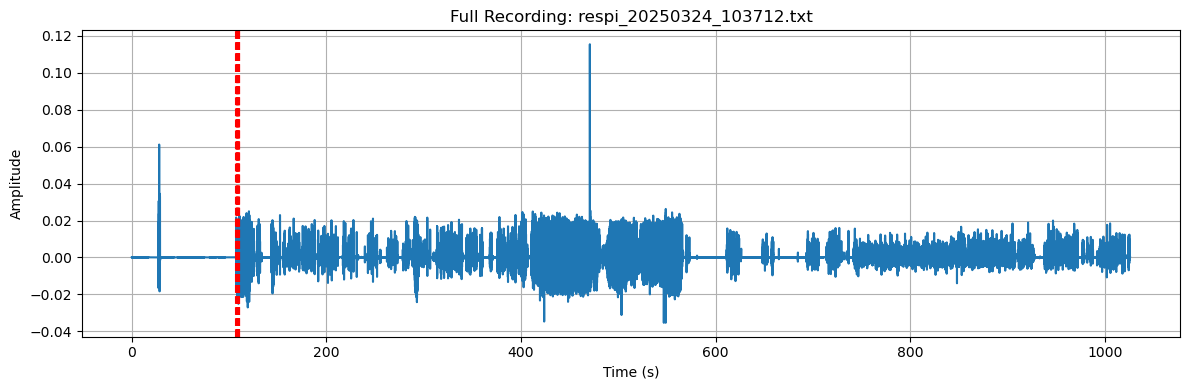

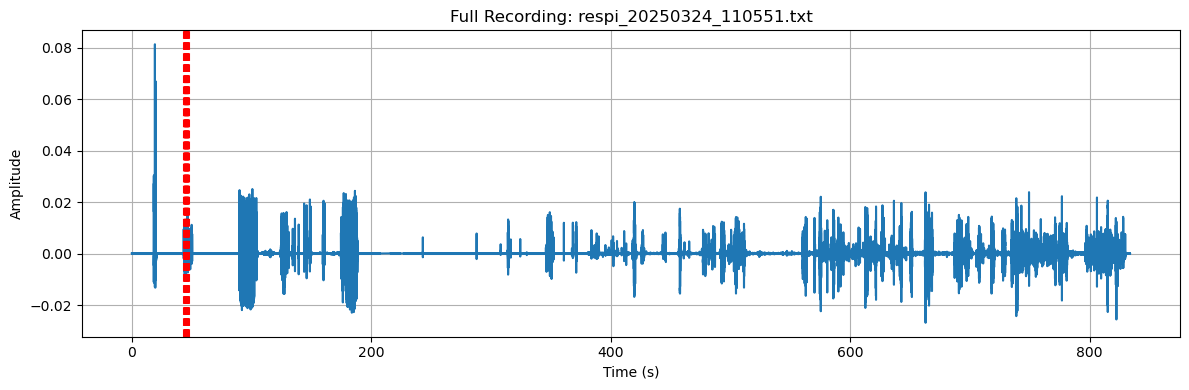

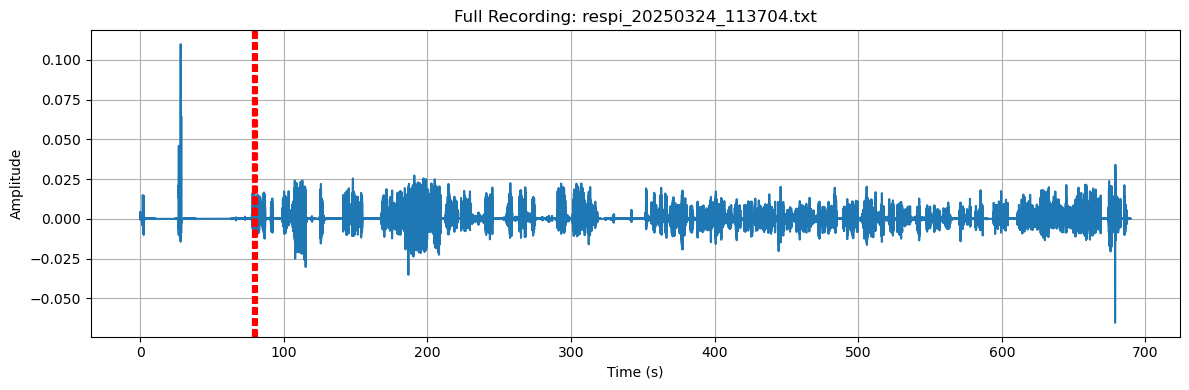

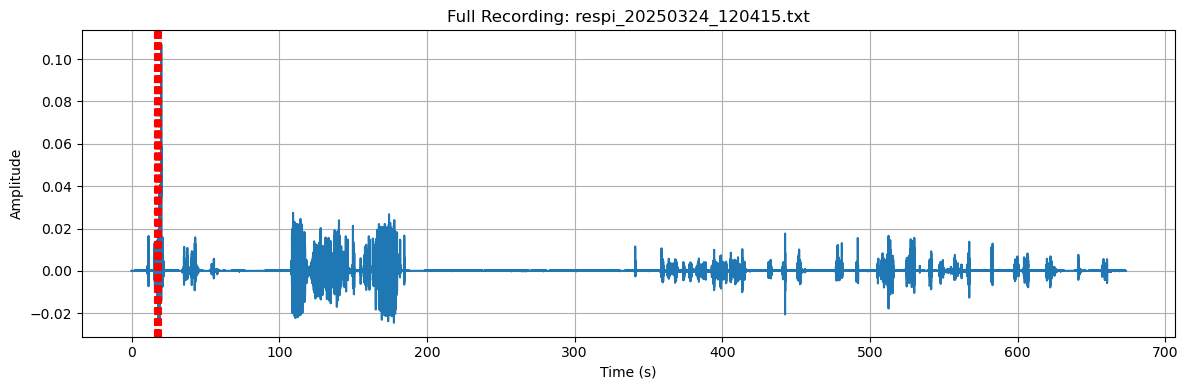

In [2]:
# Detect 5 Sync Pokes in Laser Recordings

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- Parameters ---
data_dir = r"D:\Laser\data\txt_files\flying_bees"
channel_col = 'channel_1'
time_col = 'time'
sampling_rate = 10240  # Hz
poke_min_distance = int(sampling_rate * 0.5)  # minimum distance between pokes in samples (0.5 sec)
poke_prominence = 0.01  # adjust based on signal quality
plot_margin_sec = 5  # seconds to include before and after poke times for plotting
cluster_window_sec = 5  # max time between first and last poke in a cluster

# --- Poke detection function ---
def detect_pokes(time, signal):
    peaks, _ = find_peaks(signal, distance=poke_min_distance, prominence=poke_prominence)
    peak_times = time[peaks]

    midpoint = time[-1] / 2
    clusters = []
    for i in range(len(peak_times) - 4):
        window = peak_times[i:i+5]
        if window[-1] - window[0] <= cluster_window_sec:
            clusters.append(window.tolist())
        if len(clusters) == 2:
            break

    return clusters if clusters else None

# --- Processing all files ---
results = []

for filename in os.listdir(data_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(data_dir, filename)
        try:
            df = pd.read_csv(file_path, sep='\t')
            if channel_col not in df.columns or time_col not in df.columns:
                print(f"Skipping {filename}: Missing required columns")
                continue

            signal = df[channel_col].values
            time = df[time_col].values

            poke_clusters = detect_pokes(time, signal)

            if poke_clusters is not None:
                results.append({"file": filename, "poke_clusters": poke_clusters})
            else:
                print(f"Could not detect 5 pokes in {filename}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# --- Output Summary ---
pd.set_option('display.max_colwidth', None)
summary_df = pd.DataFrame(results)
print(summary_df)

# Optional: Save to CSV
summary_df.to_csv(r"C:\Users\labadmin\Documents\Uppsala analyses\Flying bouts\detected_sync_pokes.csv", index=False)

# Visualize the full recording for each file
for _, row in summary_df.iterrows():
    file_path = os.path.join(data_dir, row['file'])
    df_vis = pd.read_csv(file_path, sep='\t')
    signal_vis = df_vis[channel_col].values
    time_vis = df_vis[time_col].values

    plt.figure(figsize=(12, 4))
    plt.plot(time_vis, signal_vis, label='Raw Signal')
    if row['poke_clusters']:
        for cluster in row['poke_clusters'][:2]:
            for pt in cluster:
                plt.axvline(x=pt, color='r', linestyle='--')
    plt.title(f"Full Recording: {row['file']}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

                         file  \
0   respi_20250310_111645.txt   
1   respi_20250310_133455.txt   
2   respi_20250310_145836.txt   
3   respi_20250310_153402.txt   
4   respi_20250311_125224.txt   
5   respi_20250311_132313.txt   
6   respi_20250312_082147.txt   
7   respi_20250312_090451.txt   
8   respi_20250320_090201.txt   
9   respi_20250320_093847.txt   
10  respi_20250320_102350.txt   
11  respi_20250320_104858.txt   
12  respi_20250320_111333.txt   
13  respi_20250320_114134.txt   
14  respi_20250320_124101.txt   
15  respi_20250320_134513.txt   
16  respi_20250320_141545.txt   
17  respi_20250320_150319.txt   
18  respi_20250323_091109.txt   
19  respi_20250323_093517.txt   
20  respi_20250323_103905.txt   
21  respi_20250323_110532.txt   
22  respi_20250323_114537.txt   
23  respi_20250323_124219.txt   
24  respi_20250323_133740.txt   
25  respi_20250323_140749.txt   
26  respi_20250323_143735.txt   
27  respi_20250324_103712.txt   
28  respi_20250324_110551.txt   
29  respi_

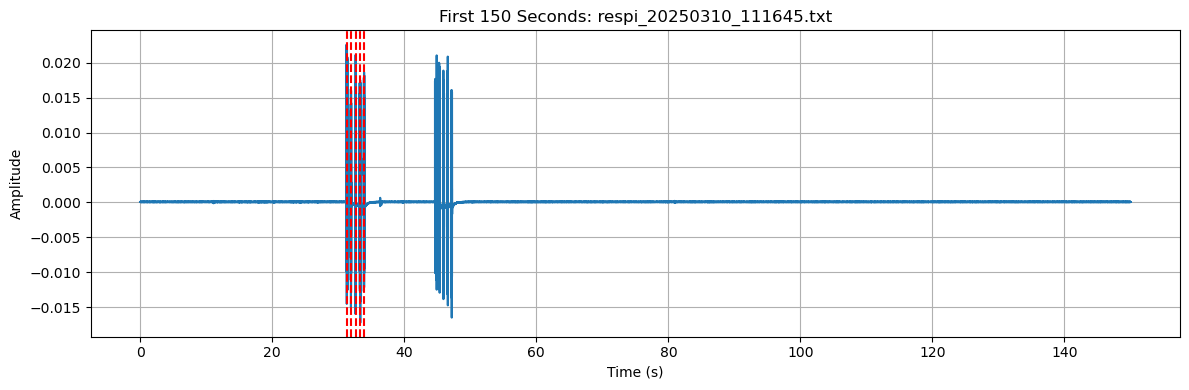

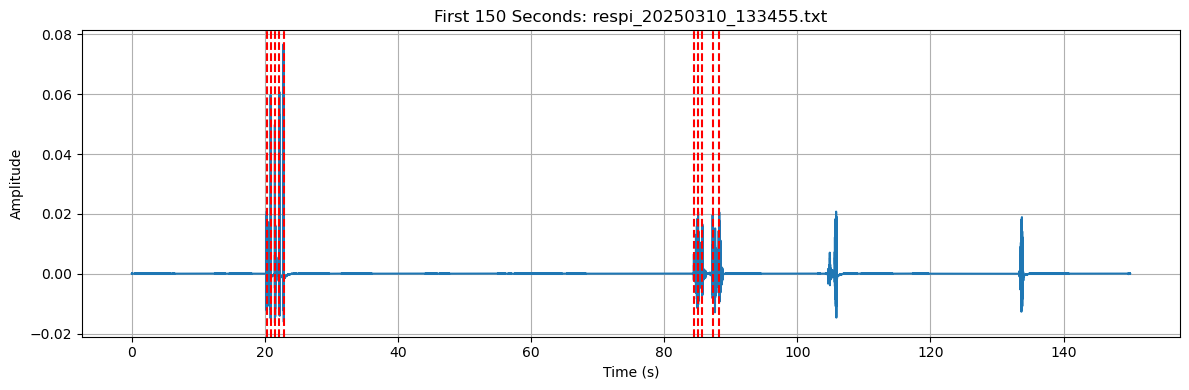

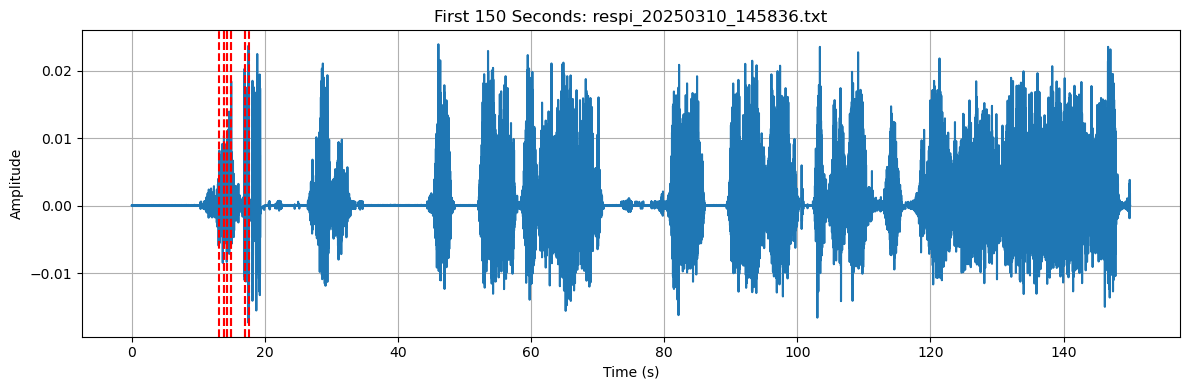

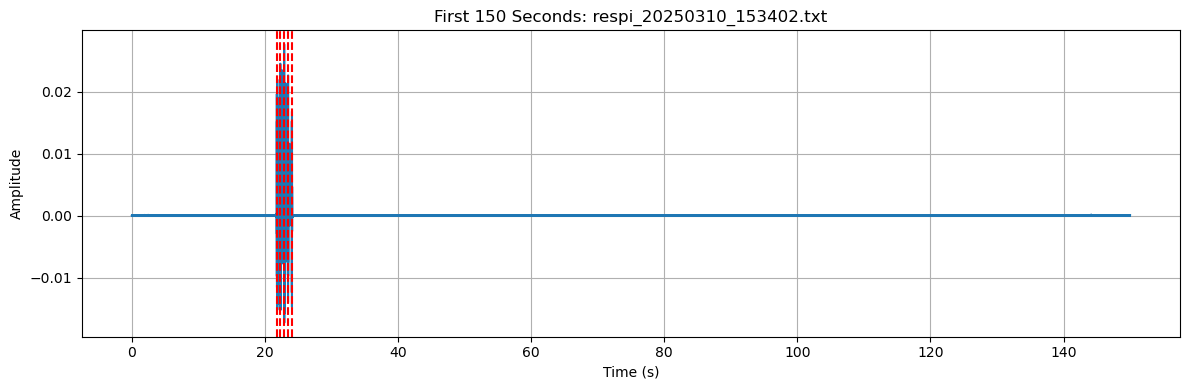

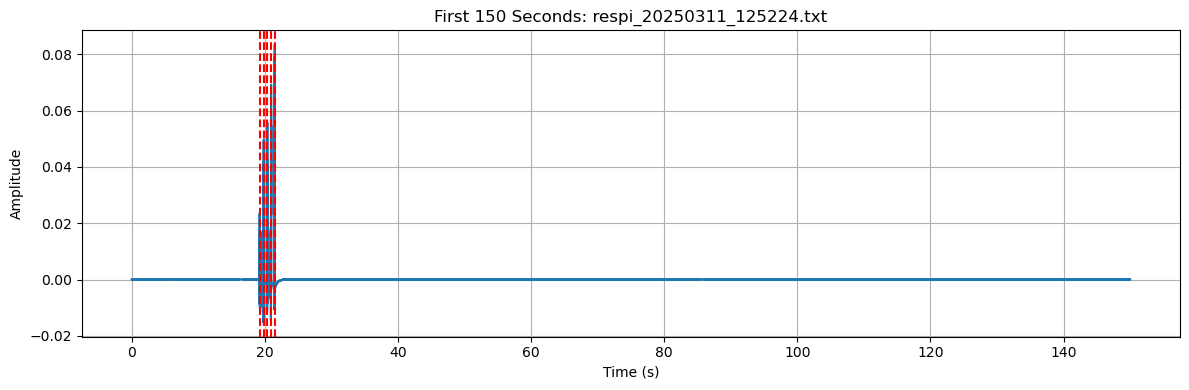

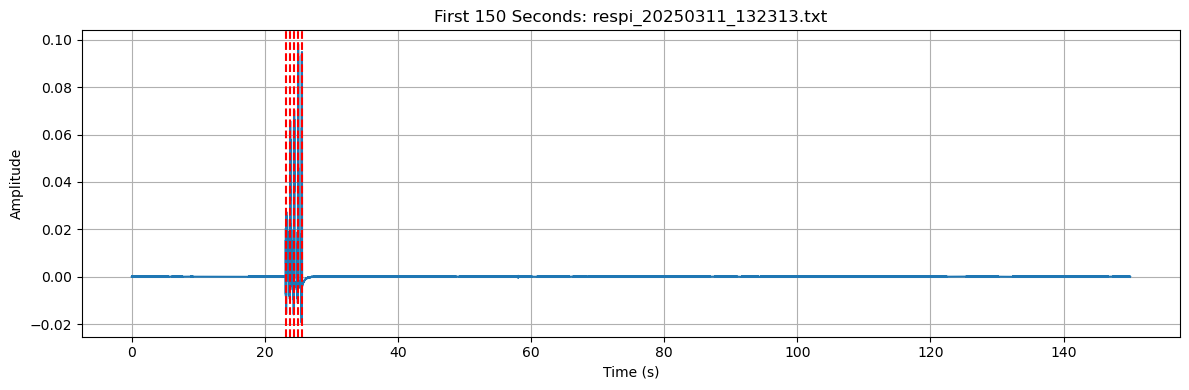

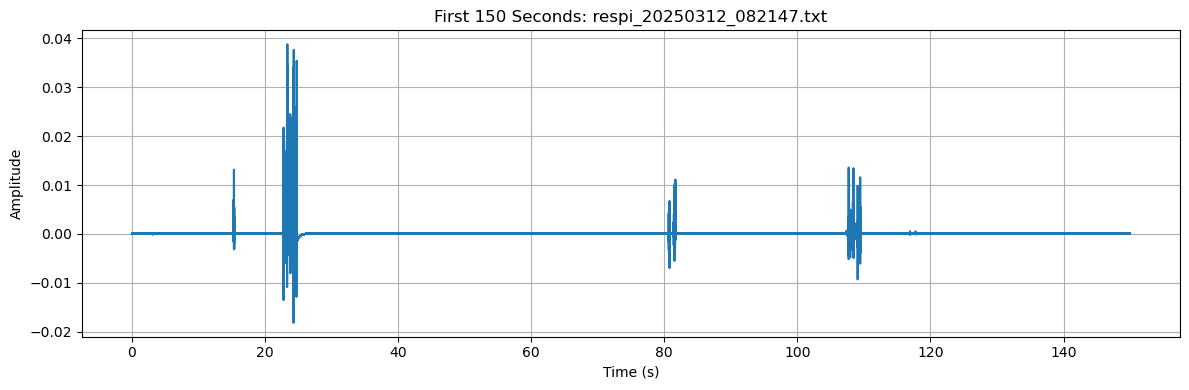

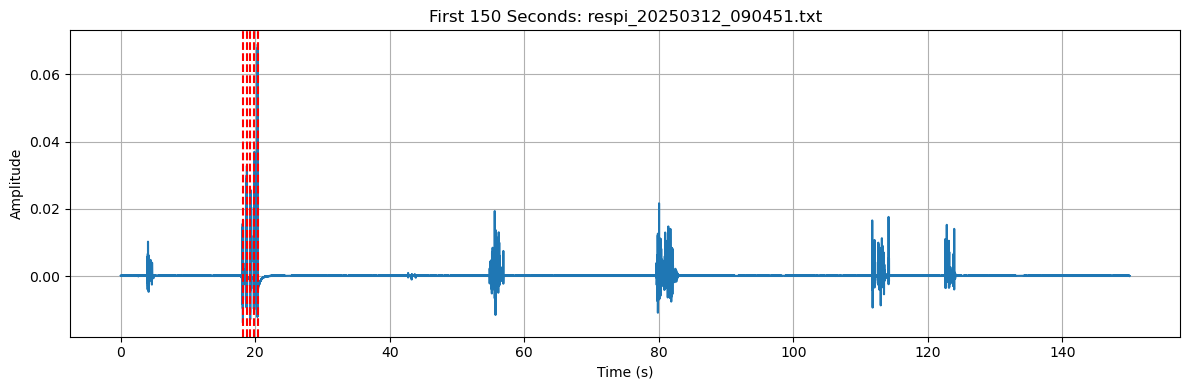

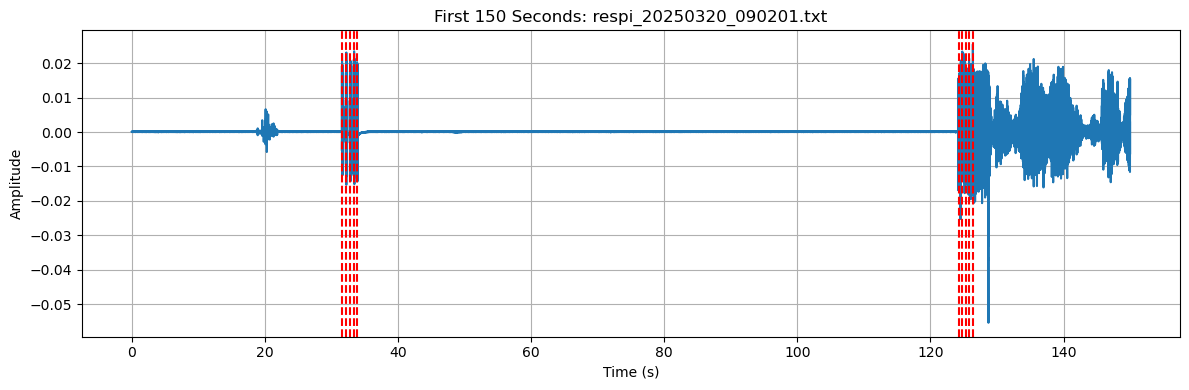

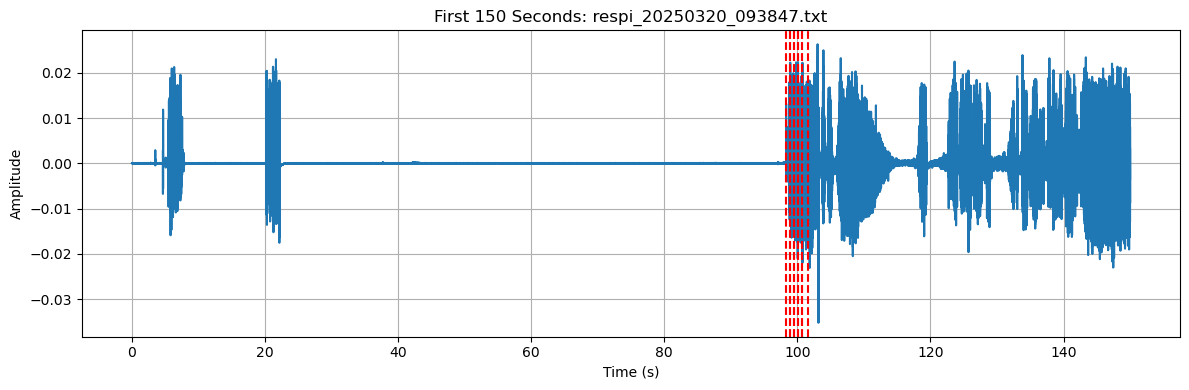

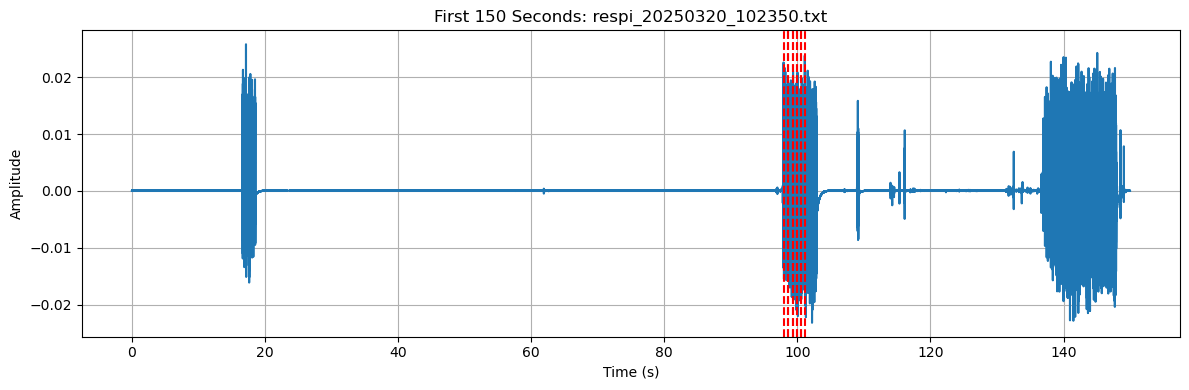

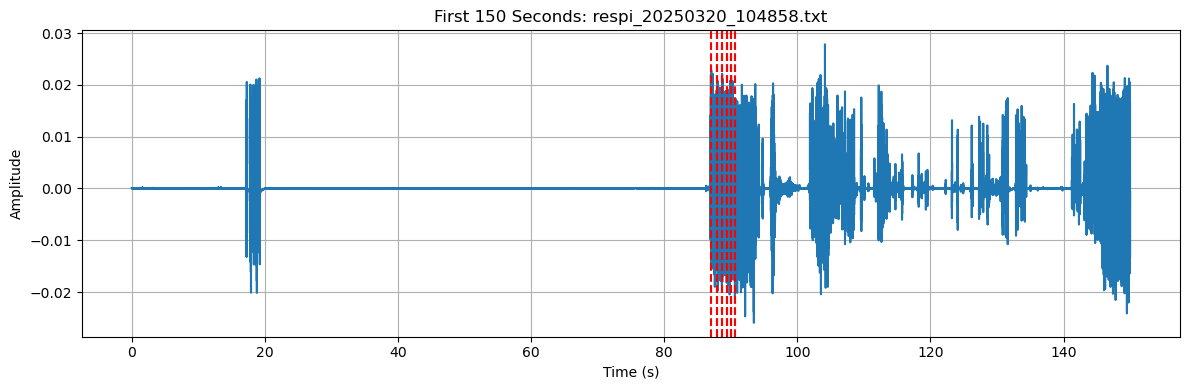

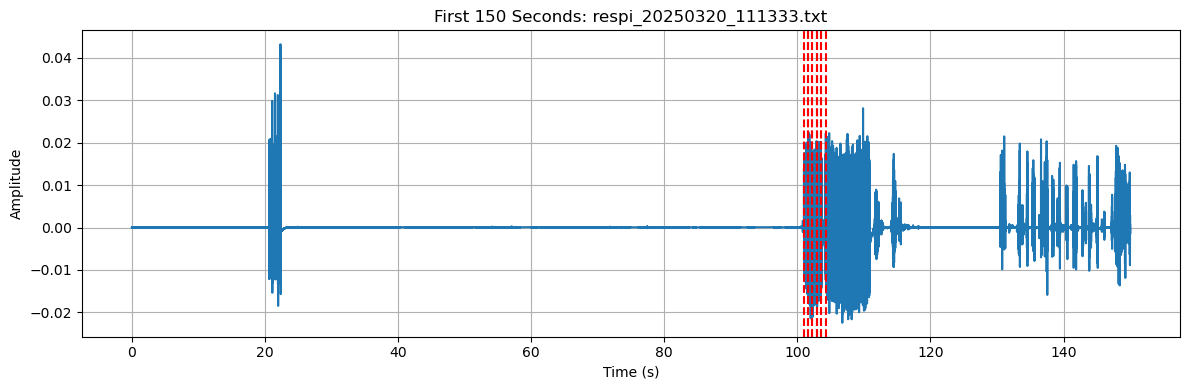

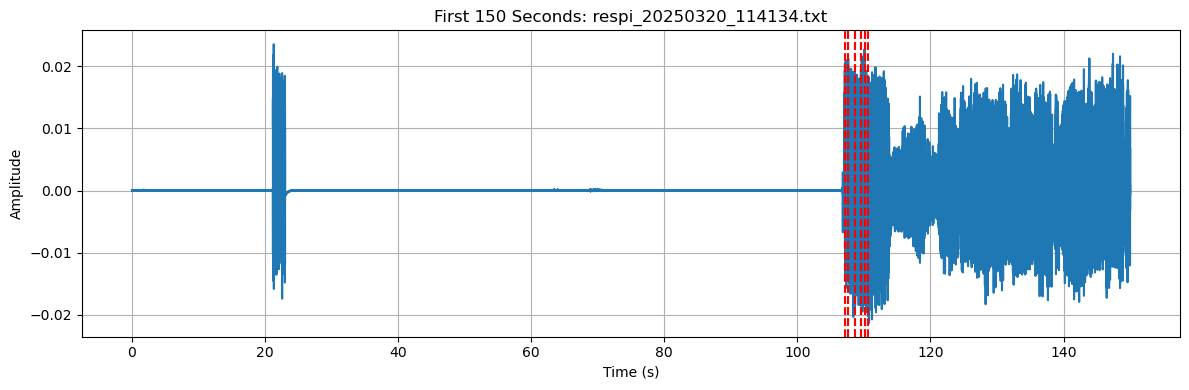

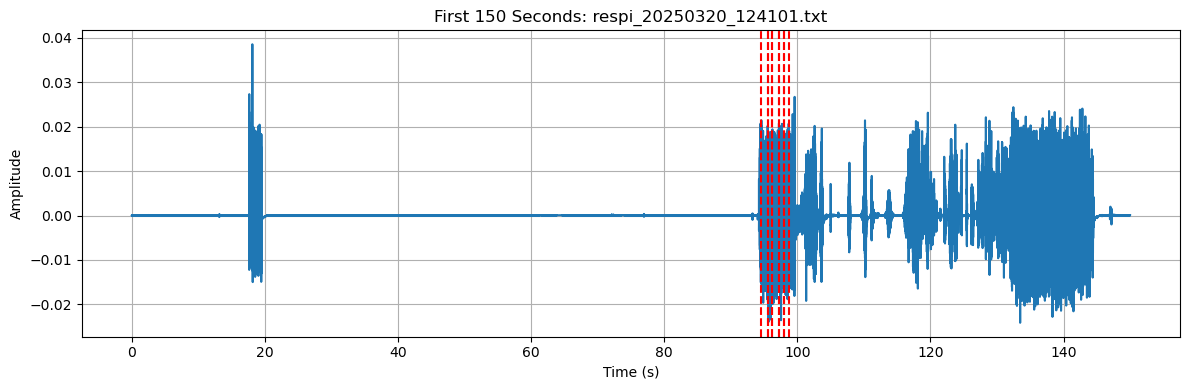

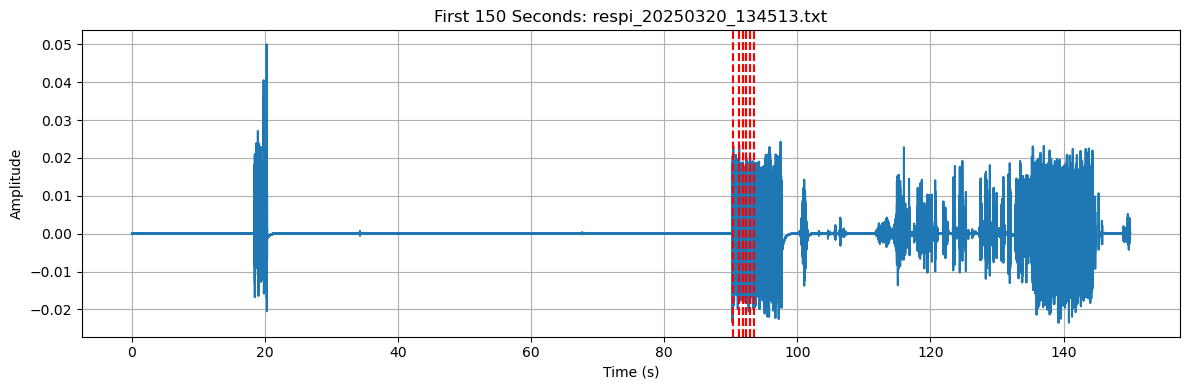

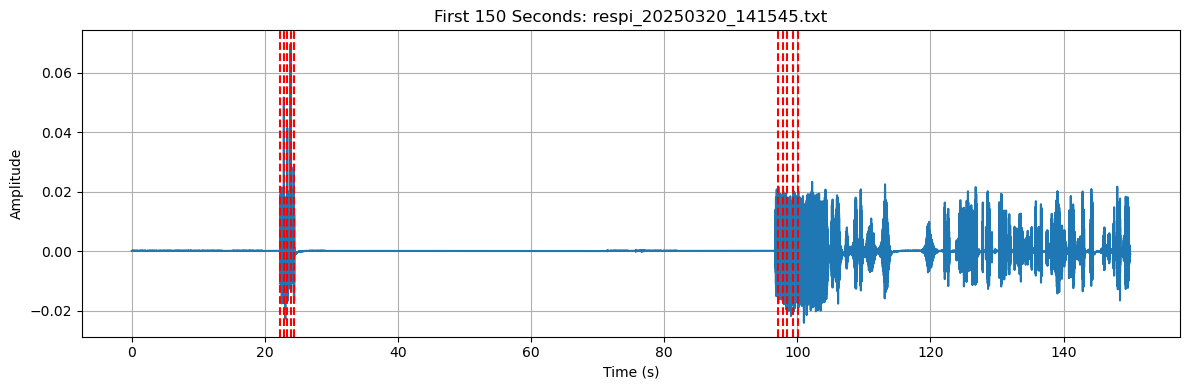

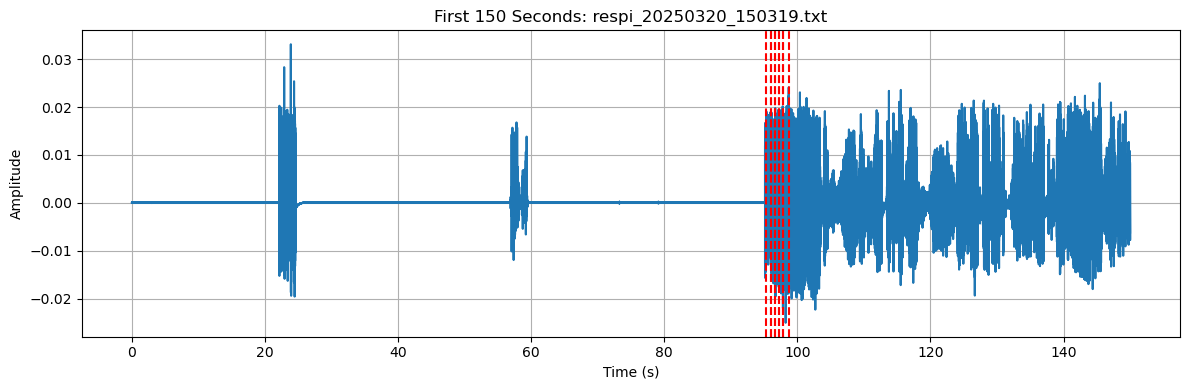

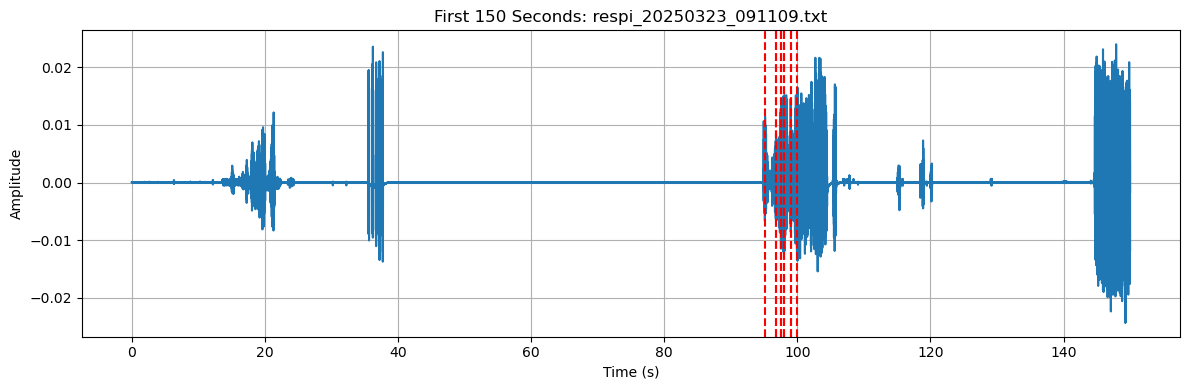

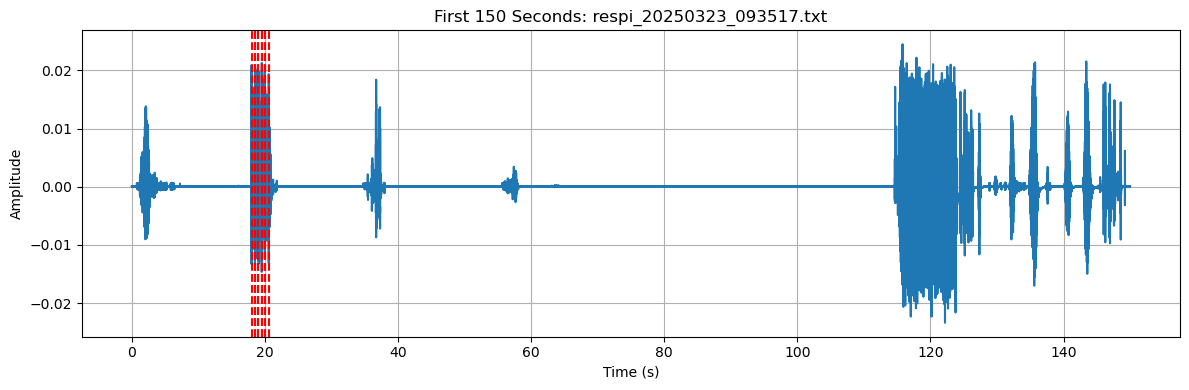

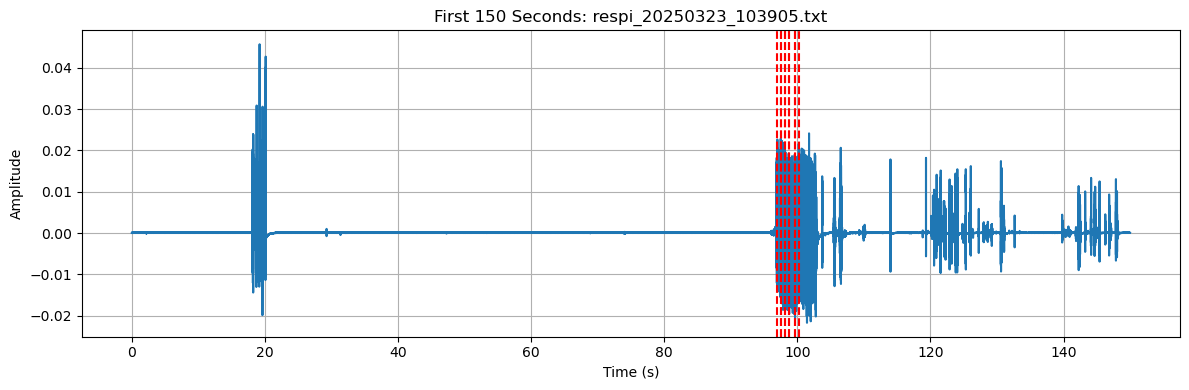

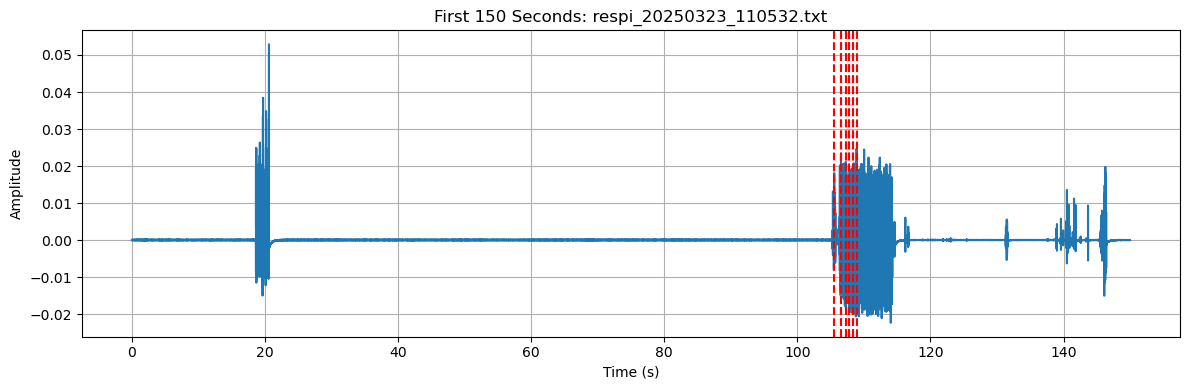

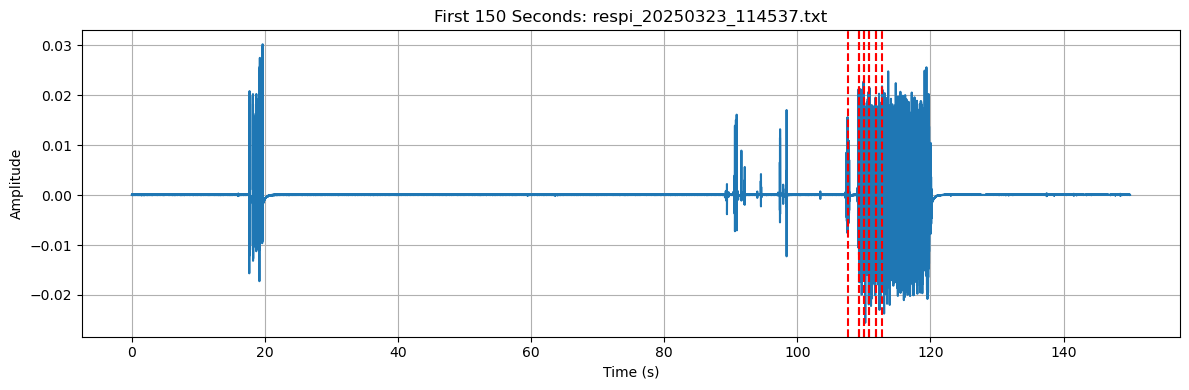

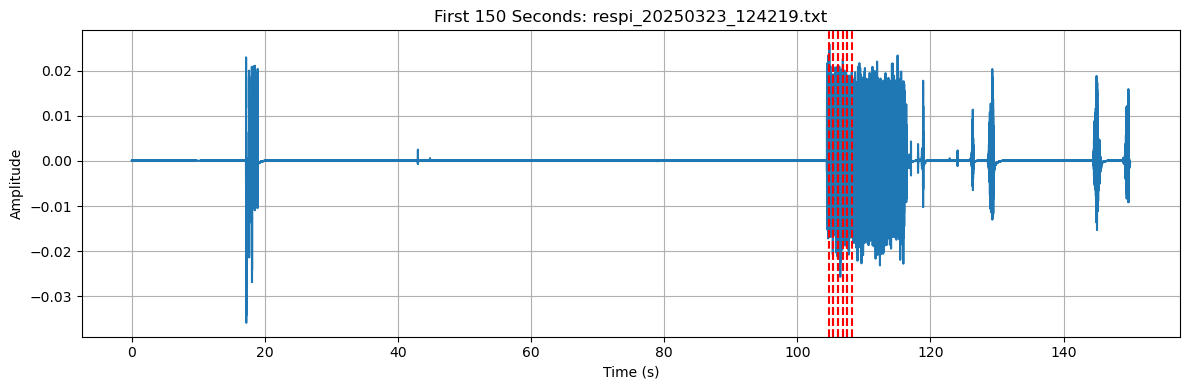

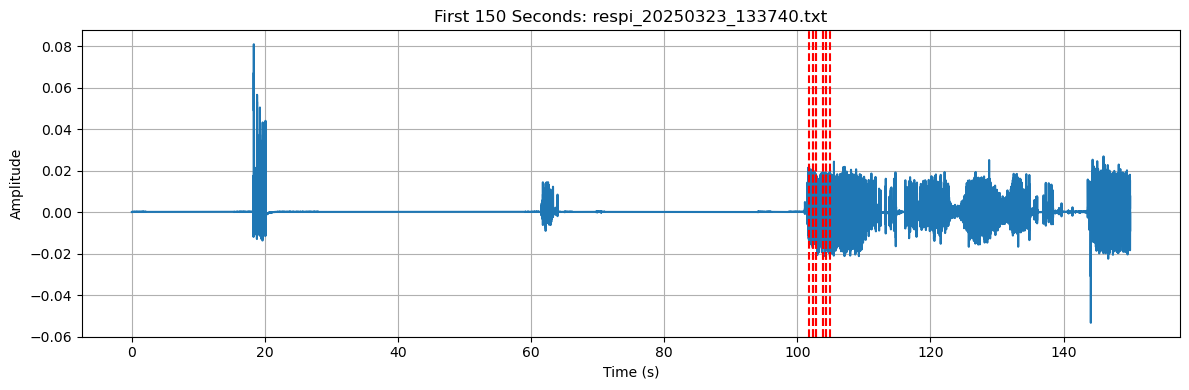

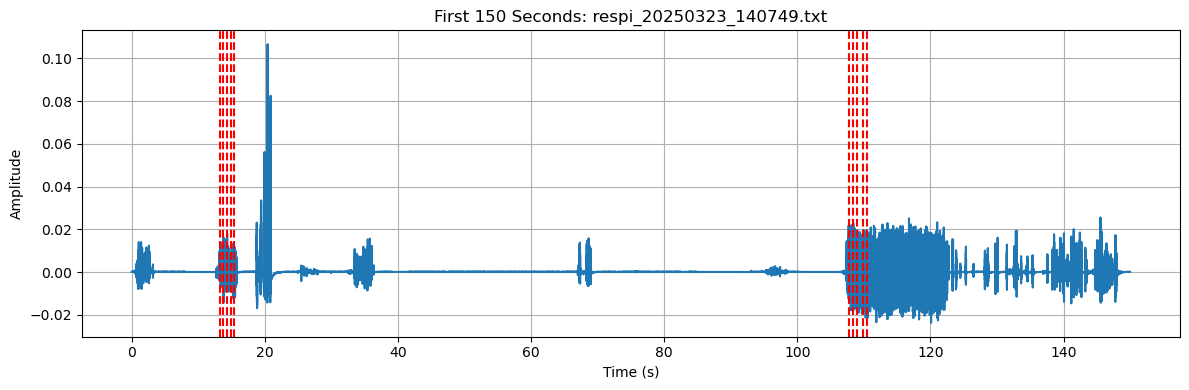

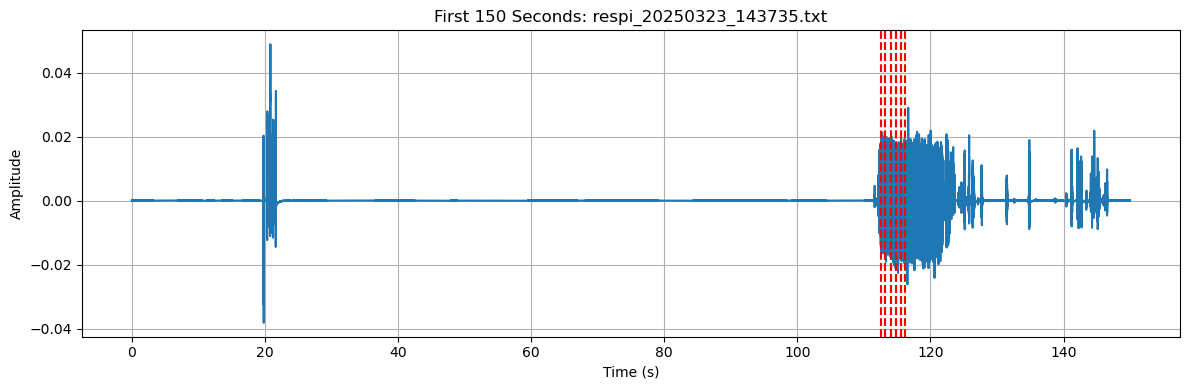

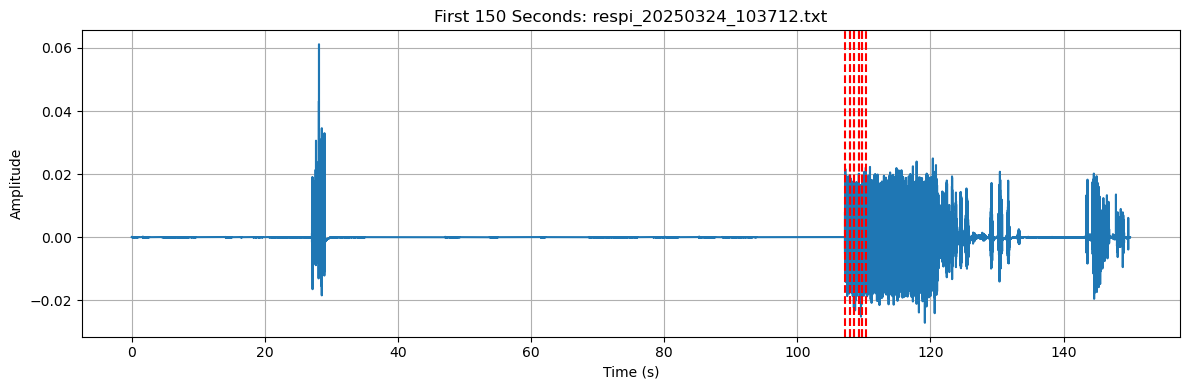

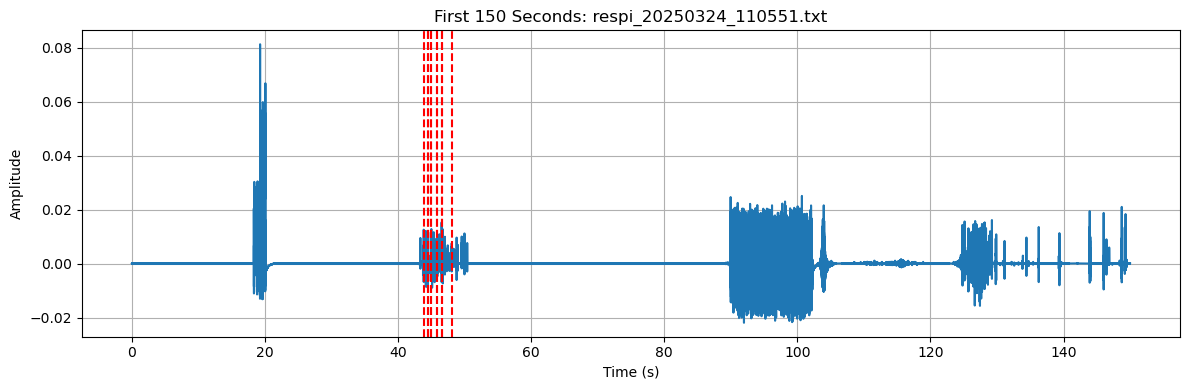

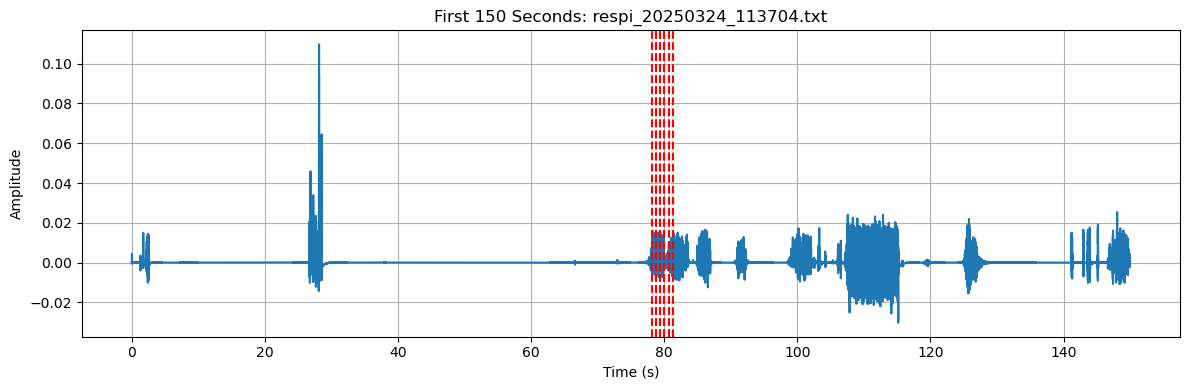

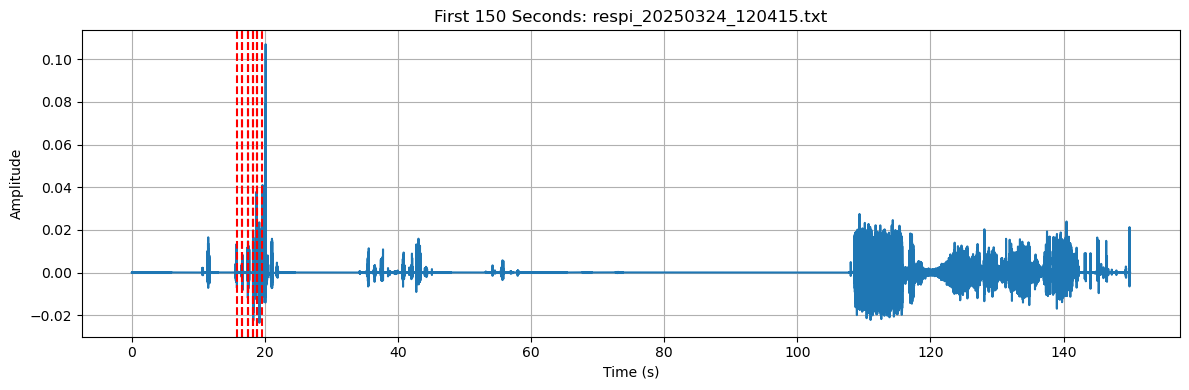

In [3]:
# Detect 5 Sync Pokes in Laser Recordings

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- Parameters ---
data_dir = r"D:\Laser\data\txt_files\flying_bees"
channel_col = 'channel_1'
time_col = 'time'
sampling_rate = 10240  # Hz
poke_min_distance = int(sampling_rate * 0.5)  # minimum distance between pokes in samples (0.5 sec)
poke_prominence = 0.01  # adjust based on signal quality
plot_margin_sec = 5  # seconds to include before and after poke times for plotting
cluster_window_sec = 5  # max time between first and last poke in a cluster

# --- Poke detection function ---
def detect_pokes(time, signal):
    peaks, _ = find_peaks(signal, distance=poke_min_distance, prominence=poke_prominence)
    peak_times = time[peaks]

    midpoint = time[-1] / 2
    clusters = []
    for i in range(len(peak_times) - 4):
        window = peak_times[i:i+5]
        if window[-1] - window[0] <= cluster_window_sec:
            clusters.append(window.tolist())
        if len(clusters) == 2:
            break

    return clusters if clusters else None

# --- Processing all files ---
results = []

for filename in os.listdir(data_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(data_dir, filename)
        try:
            df = pd.read_csv(file_path, sep='\t')
            if channel_col not in df.columns or time_col not in df.columns:
                print(f"Skipping {filename}: Missing required columns")
                continue

            signal = df[channel_col].values
            time = df[time_col].values

            poke_clusters = detect_pokes(time, signal)

            if poke_clusters is not None:
                results.append({"file": filename, "poke_clusters": poke_clusters})
            else:
                print(f"Could not detect 5 pokes in {filename}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# --- Output Summary ---
pd.set_option('display.max_colwidth', None)
summary_df = pd.DataFrame(results)
print(summary_df)

# Optional: Save to CSV
summary_df.to_csv(r"C:\Users\labadmin\Documents\Uppsala analyses\Flying bouts\detected_sync_pokes.csv", index=False)

# Visualize the first 150 seconds for each file
for _, row in summary_df.iterrows():
    file_path = os.path.join(data_dir, row['file'])
    df_vis = pd.read_csv(file_path, sep='\t')
    signal_vis = df_vis[channel_col].values
    time_vis = df_vis[time_col].values

    mask = time_vis <= 150

    plt.figure(figsize=(12, 4))
    plt.plot(time_vis[mask], signal_vis[mask], label='Raw Signal')
    if row['poke_clusters']:
        for cluster in row['poke_clusters'][:2]:
            for pt in cluster:
                if pt <= 150:
                    plt.axvline(x=pt, color='r', linestyle='--')
    plt.title(f"First 150 Seconds: {row['file']}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

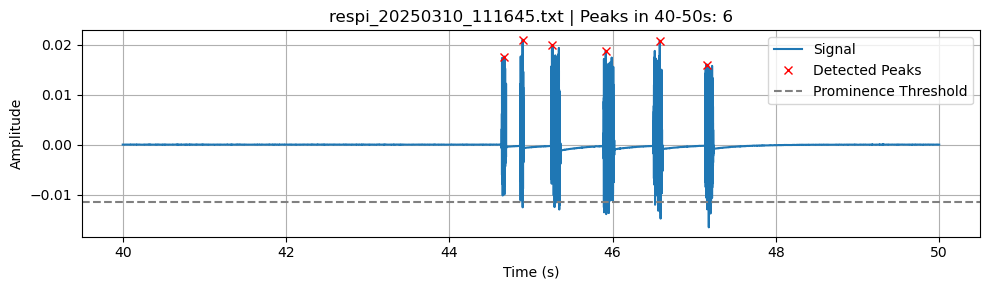

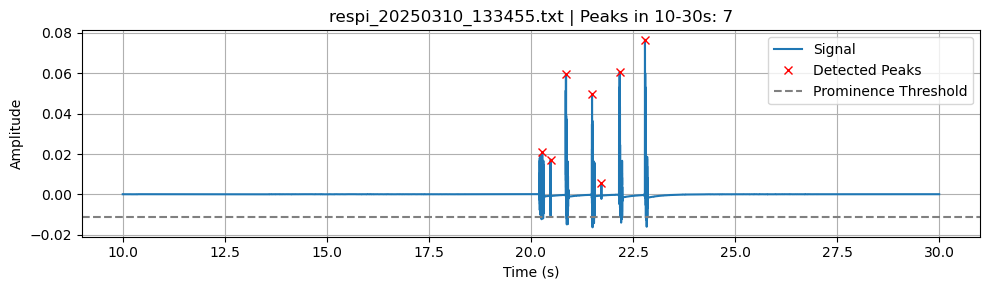

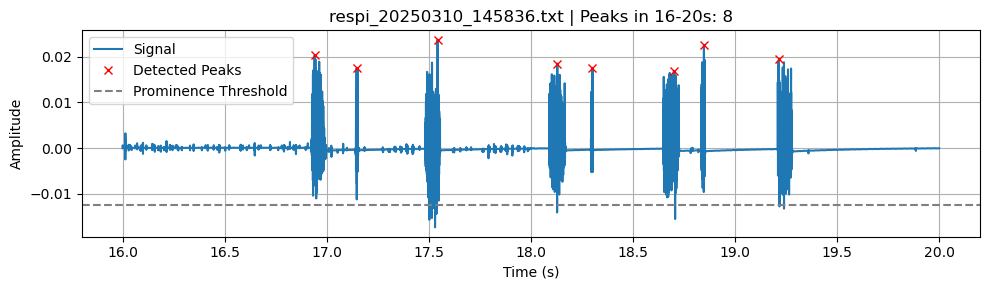

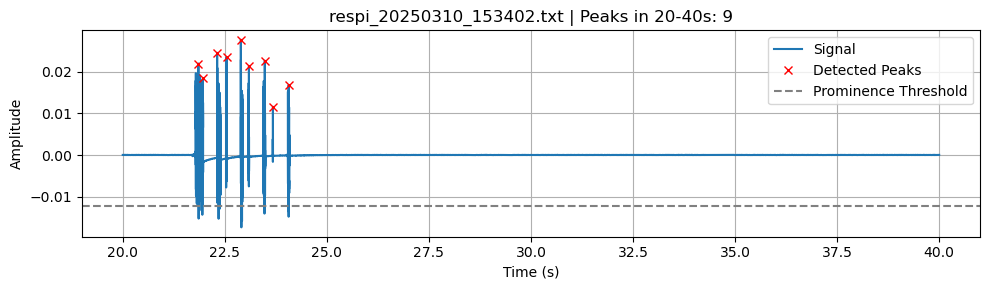

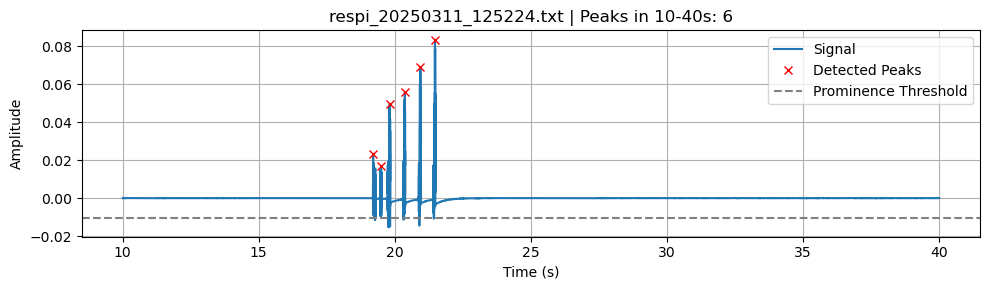

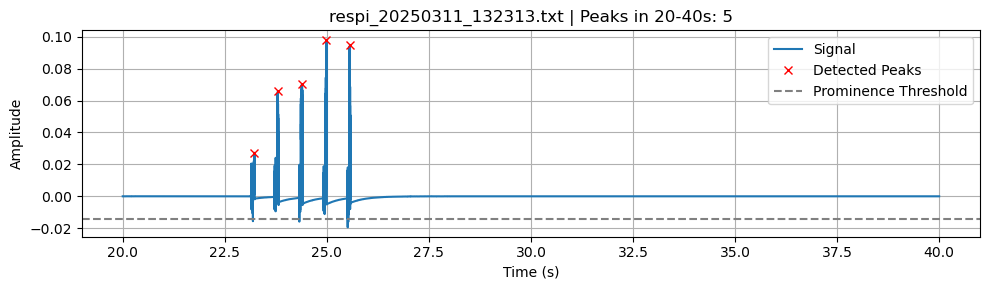

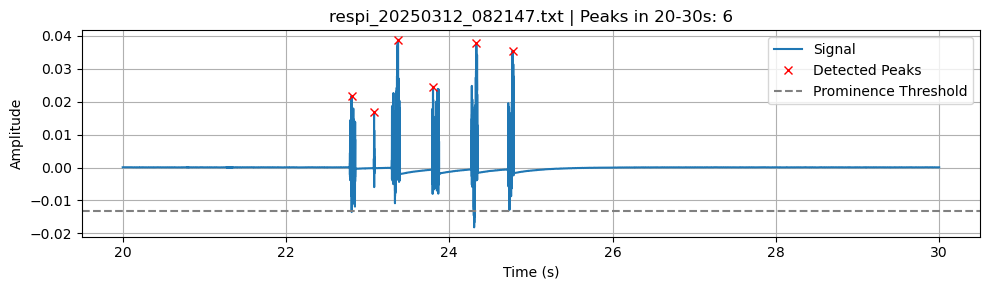

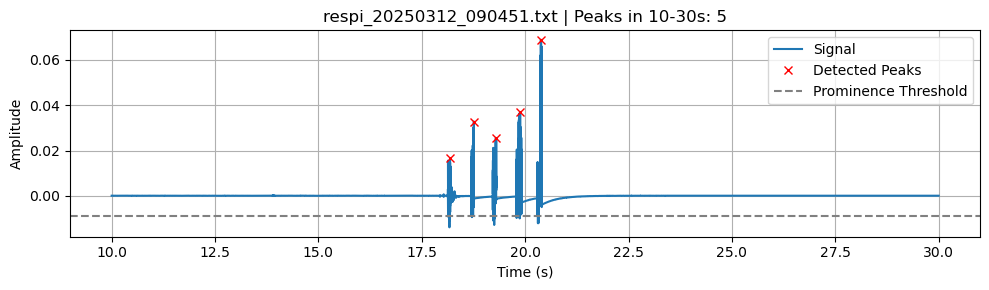

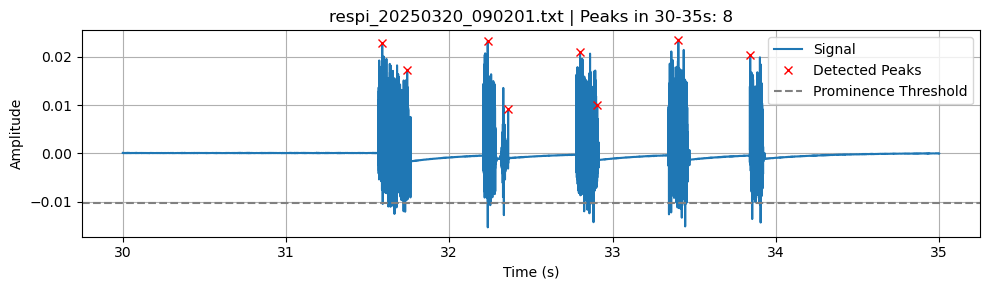

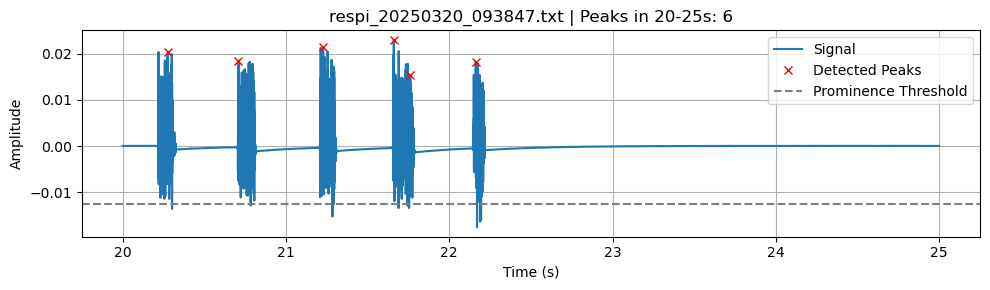

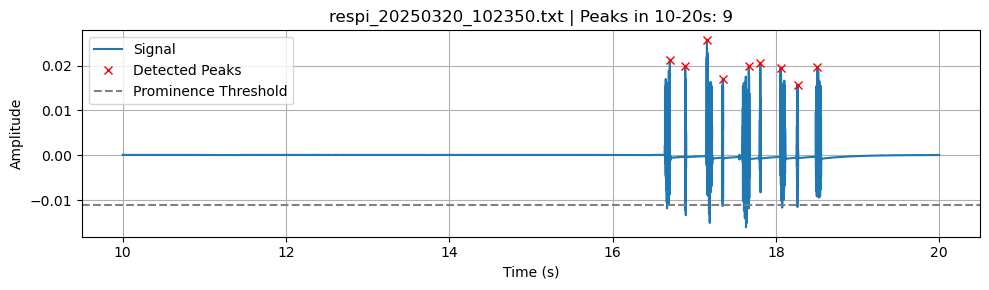

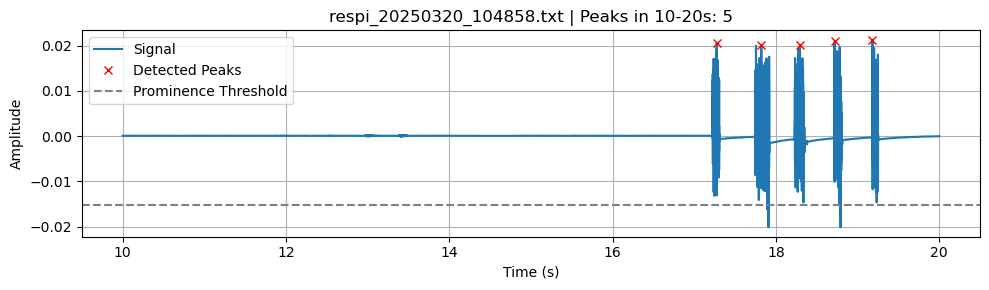

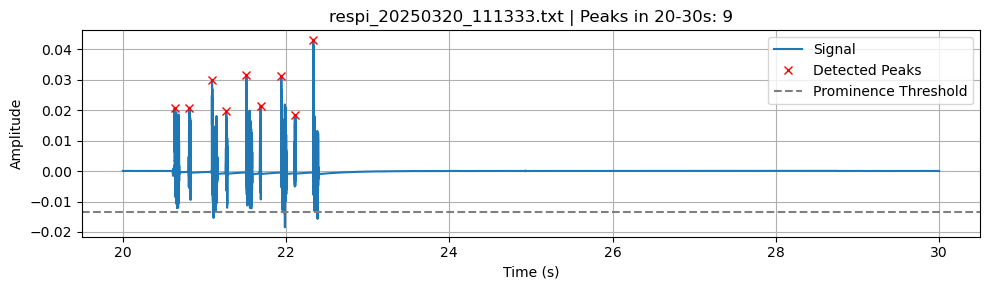

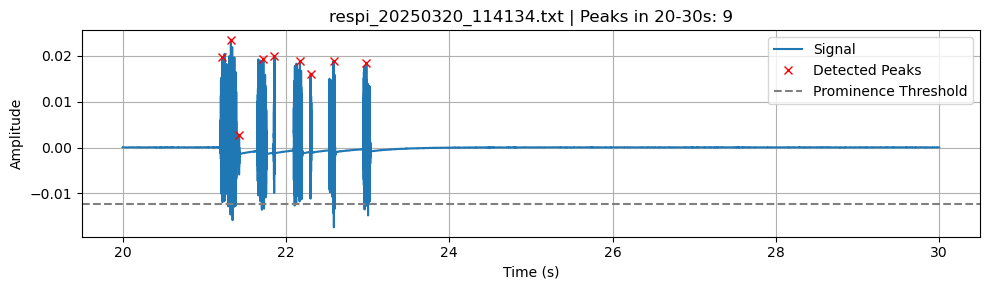

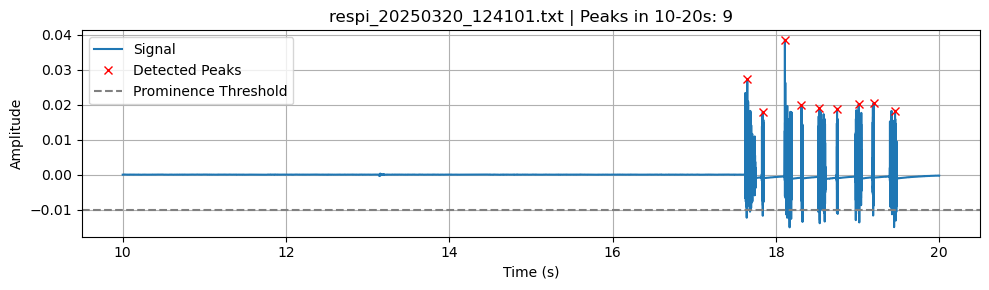

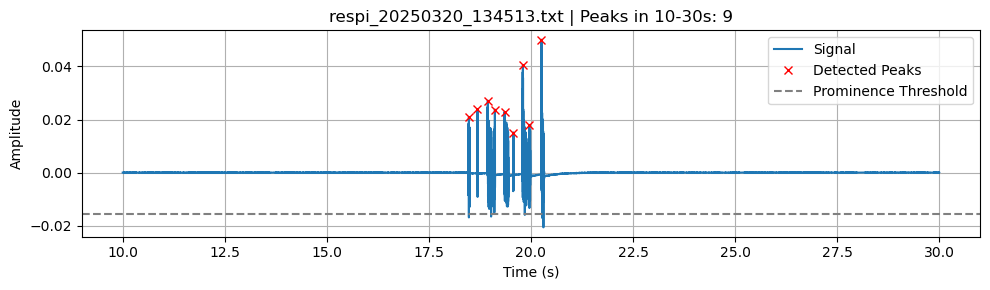

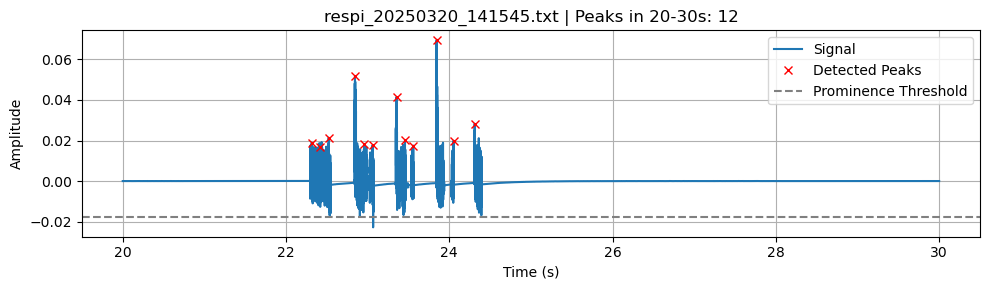

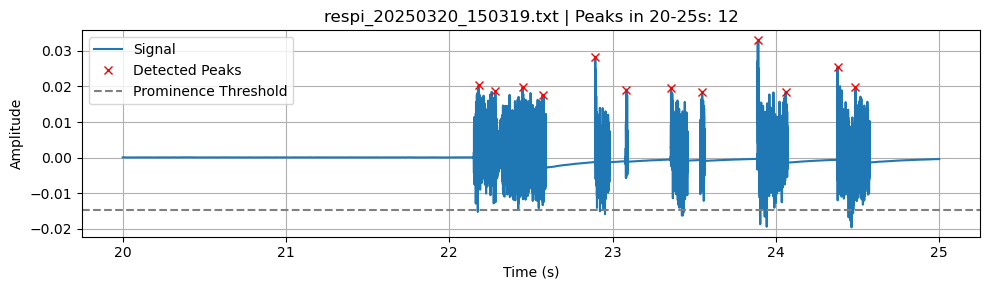

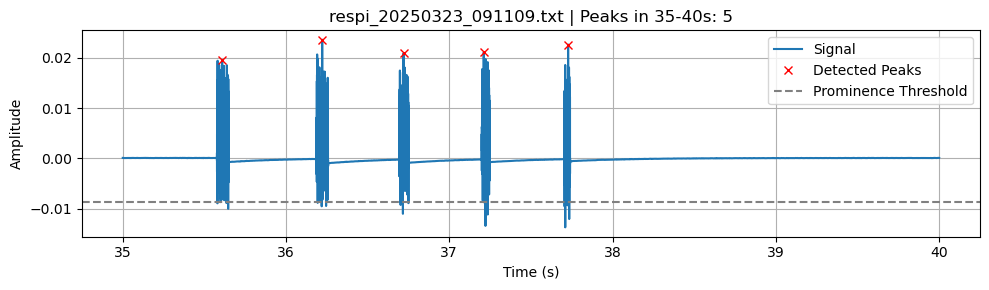

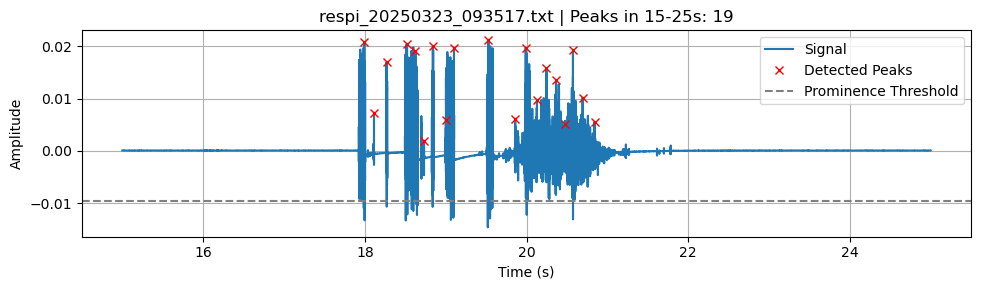

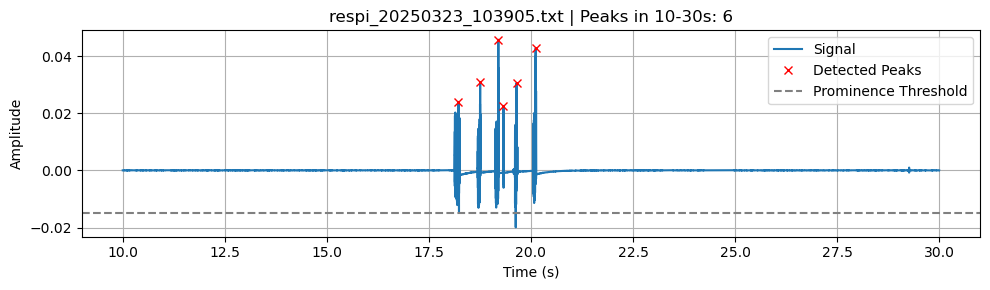

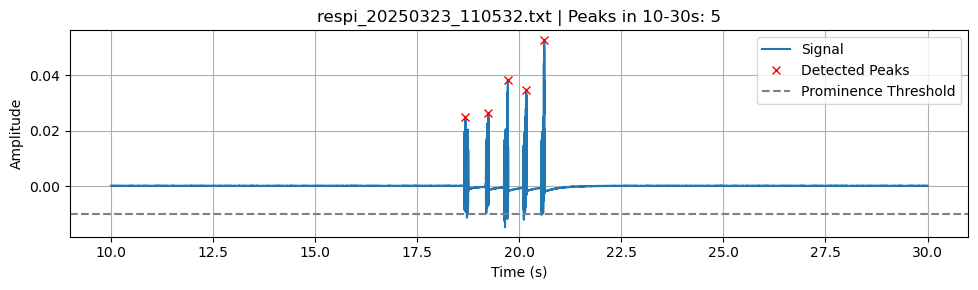

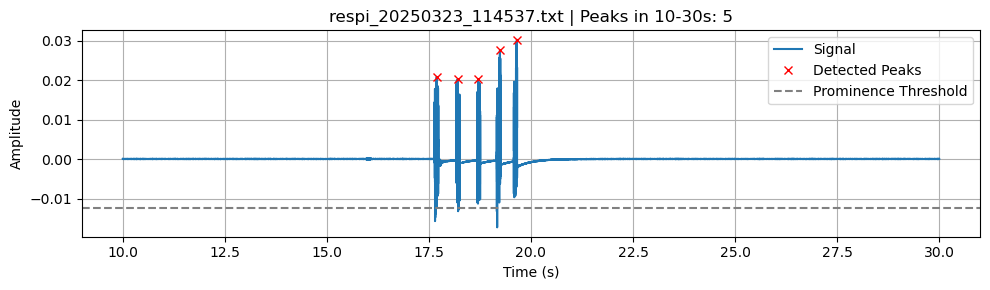

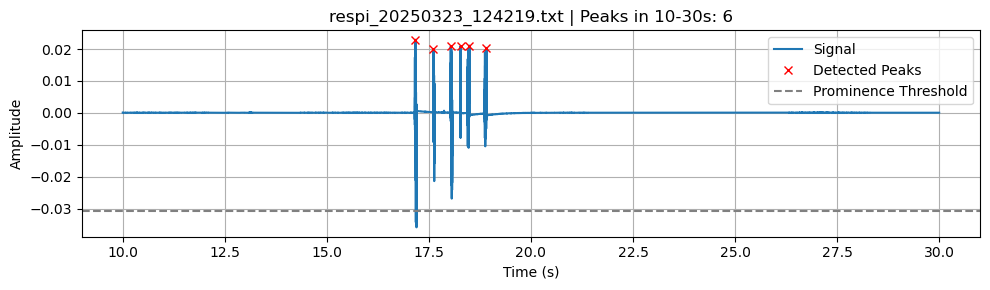

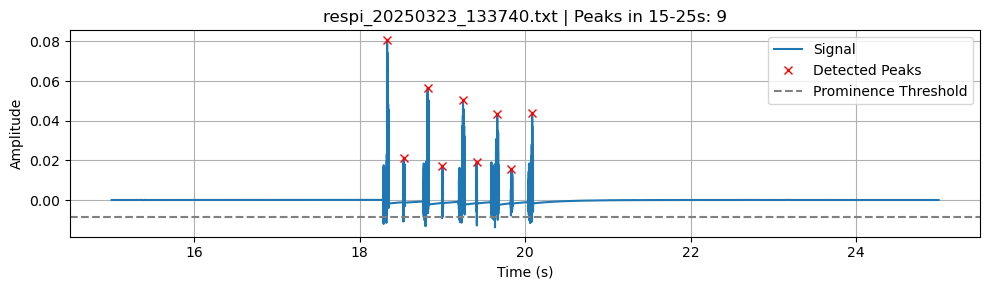

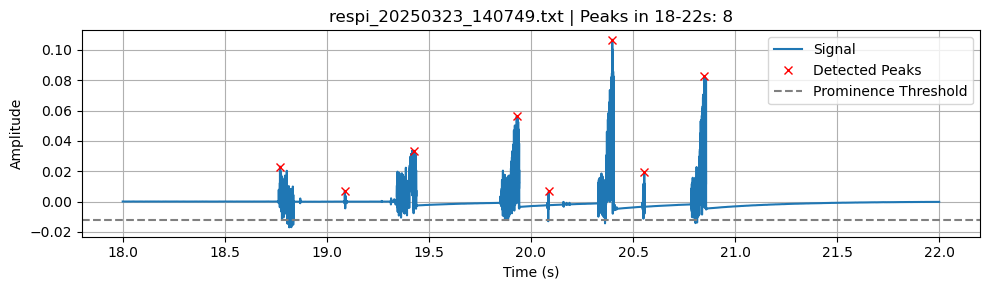

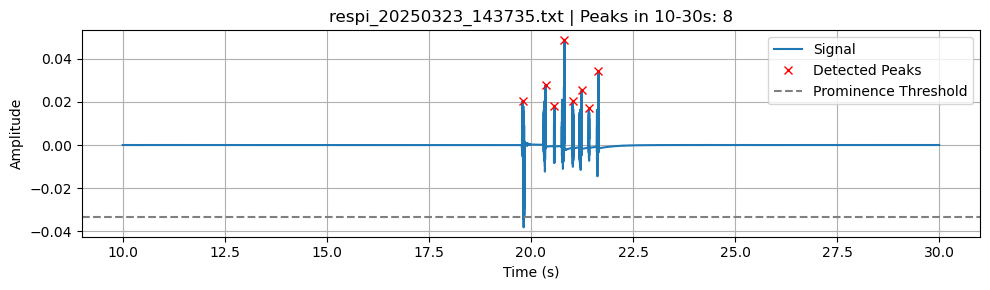

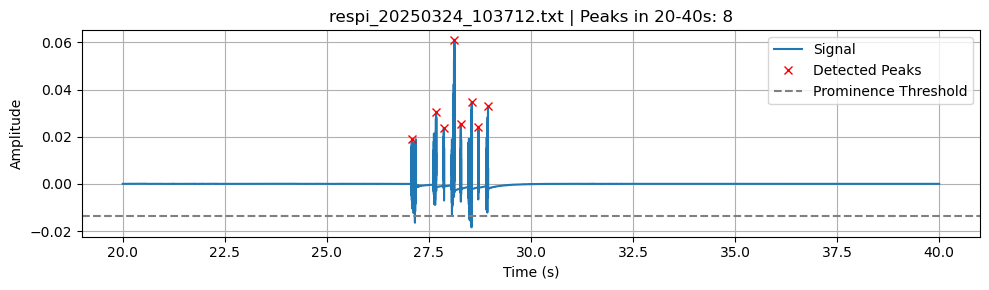

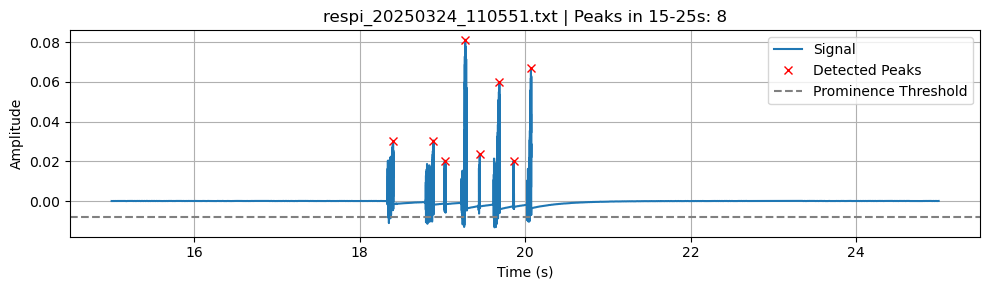

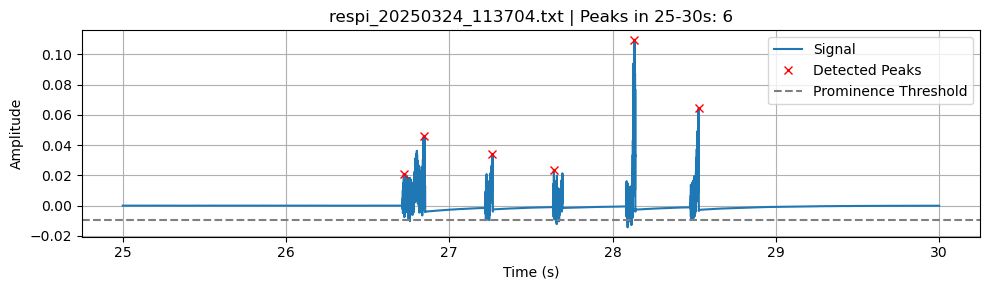

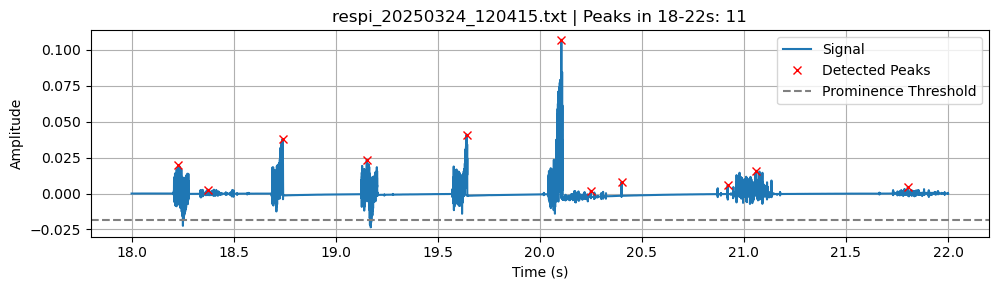

                         file  start_s  end_s  peak_count  first_peak_time
0   respi_20250310_111645.txt       40     50           6         44.67549
1   respi_20250310_133455.txt       10     30           7         20.27695
2   respi_20250310_145836.txt       16     20           8         16.94004
3   respi_20250310_153402.txt       20     40           9         21.85293
4   respi_20250311_125224.txt       10     40           6         19.20127
5   respi_20250311_132313.txt       20     40           5         23.22002
6   respi_20250312_082147.txt       20     30           6         22.80234
7   respi_20250312_090451.txt       10     30           5         18.18340
8   respi_20250320_090201.txt       30     35           8         31.58916
9   respi_20250320_093847.txt       20     25           6         20.27705
10  respi_20250320_102350.txt       10     20           9         16.70078
11  respi_20250320_104858.txt       10     20           5         17.27598
12  respi_20250320_111333

PermissionError: [Errno 13] Permission denied: 'D:\\Laser\\data\\txt_files\\flying_bees\\peak_counts_in_windows.xlsx'

In [1]:
# Detect 5 Sync Pokes in Laser Recordings

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# --- Parameters ---
data_dir = r"D:\Laser\data\txt_files\flying_bees"
channel_col = 'channel_1'
time_col = 'time'
sampling_rate = 10240  # Hz
poke_min_distance = int(sampling_rate * 0.1) # minimum distance between pokes in samples (0.1 sec)
poke_prominence = 0.005  # lowered prominence to catch smaller peaks
plot_margin_sec = 5  # seconds to include before and after poke times for plotting
cluster_window_sec = 5  # max time between first and last poke in a cluster

# --- Load time window info ---
excel_path = r"D:\Laser\data\txt_files\flying_bees\laser_time_window.xlsx"
df_windows = pd.read_excel(excel_path)

# --- Count and visualize peaks in time windows ---
peak_counts = []

for _, row in df_windows.iterrows():
    file_txt = row['laser_file'] + ".txt"
    start_s = row['start_s']
    end_s = row['end_s']
    file_path = os.path.join(data_dir, file_txt)

    if not os.path.exists(file_path):
        print(f"File not found: {file_txt}")
        continue

    try:
        df = pd.read_csv(file_path, sep='\t')
        if channel_col not in df.columns or time_col not in df.columns:
            print(f"Skipping {file_txt}: Missing required columns")
            continue

        signal = df[channel_col].values
        time = df[time_col].values

        mask = (time >= start_s) & (time <= end_s)
        time_window = time[mask]
        signal_window = signal[mask]

        peaks, _ = find_peaks(signal_window, distance=poke_min_distance, prominence=poke_prominence)
        peak_count = len(peaks)
        first_peak_time = time_window[peaks[0]] if peak_count > 0 else None

        peak_counts.append({"file": file_txt, "start_s": start_s, "end_s": end_s, "peak_count": peak_count, "first_peak_time": first_peak_time})

        # Plot the window with peaks and threshold line
        plt.figure(figsize=(10, 3))
        plt.plot(time_window, signal_window, label='Signal')
        plt.plot(time_window[peaks], signal_window[peaks], 'rx', label='Detected Peaks')
        threshold_line = np.min(signal_window) + poke_prominence
        plt.axhline(y=threshold_line, color='gray', linestyle='--', label='Prominence Threshold')
        plt.title(f"{file_txt} | Peaks in {start_s}-{end_s}s: {peak_count}")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {file_txt}: {e}")

# --- Summary Table ---
peak_summary_df = pd.DataFrame(peak_counts)
print(peak_summary_df)

# Optional: Save to Excel
peak_summary_df.to_excel(r"D:\Laser\data\txt_files\flying_bees\peak_counts_in_windows.xlsx", index=False)